<a href="https://colab.research.google.com/github/royarkaofficial/IPL-Data-Analyst_5th_April_2025/blob/main/IPL_Data_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSV Files/matches.csv")
deliveries_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSV Files/deliveries.csv")

In [4]:
matches_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [6]:
matches_df.shape

(1095, 20)

In [7]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [8]:
print(matches_df.isna().sum())

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


In [9]:
matches_df[matches_df['city'].isna()]['venue'].unique()

array(['Sharjah Cricket Stadium', 'Dubai International Cricket Stadium'],
      dtype=object)

In [11]:
missing_city_venue = matches_df[matches_df['city'].isna()][['city', 'venue']].drop_duplicates()
print(missing_city_venue)

    city                                venue
399  NaN              Sharjah Cricket Stadium
402  NaN  Dubai International Cricket Stadium


In [15]:
venue_city_map = {"Sharjah Cricket Stadium": "Sharjah", "Dubai International Cricket Stadium": "Dubai"}
matches_df.loc[matches_df['city'].isna(), 'city'] = matches_df.loc[matches_df['city'].isna(), 'venue'].replace(venue_city_map)
matches_df['city'].isna().sum()

np.int64(0)

In [16]:
matches_df['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

In [17]:
matches_df.replace({"season":{"2007/08":"2008","2009/10":"2010","2020/21":"2020"}},inplace=True)
matches_df['season'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024'], dtype=object)

In [19]:
matches_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [20]:
deliveries_df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [21]:
teams_replace_dict = {"Royal Challengers Bangalore":"Royal Challengers Bengaluru",
 "Delhi Daredevils":"Delhi Capitals",
 "Kings XI Punjab":"Punjab Kings",
 "Deccan Chargers":"Sunrisers Hyderabad",
 "Gujarat Lions":"Gujarat Titans",
 "Rising Pune Supergiants":"Rising Pune Supergiant",
 "Pune Warriors":"Rising Pune Supergiant",
}

matches_df[['team1','team2','toss_winner','winner']] = matches_df[['team1','team2','toss_winner','winner']].replace(teams_replace_dict)

deliveries_df[['batting_team','bowling_team']] = deliveries_df[['batting_team','bowling_team']].replace(teams_replace_dict)

In [22]:
matches_df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [23]:
venue_replace_dict = {'Arun Jaitley Stadium' : 'Arun Jaitley Stadium, Delhi',
'Feroz Shah Kotla' : 'Arun Jaitley Stadium, Delhi',
'Brabourne Stadium' : 'Brabourne Stadium, Mumbai',
'Dr DY Patil Sports Academy' : 'Dr DY Patil Sports Academy, Mumbai',
'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium' : 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
'Eden Gardens' : 'Eden Gardens, Kolkata',
'Himachal Pradesh Cricket Association Stadium' : 'Himachal Pradesh Cricket Association Stadium, Dharamsala',
'M Chinnaswamy Stadium' : 'M Chinnaswamy Stadium, Bengaluru',
'M.Chinnaswamy Stadium' : 'M Chinnaswamy Stadium, Bengaluru',
'MA Chidambaram Stadium' : 'MA Chidambaram Stadium, Chepauk, Chennai',
'MA Chidambaram Stadium, Chepauk' : 'MA Chidambaram Stadium, Chepauk, Chennai',
'Maharashtra Cricket Association Stadium' : 'Maharashtra Cricket Association Stadium, Pune',
'Sardar Patel Stadium, Motera' : 'Narendra Modi Stadium, Ahmedabad',
'Punjab Cricket Association IS Bindra Stadium' : 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
'Punjab Cricket Association IS Bindra Stadium, Mohali' : 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
'Punjab Cricket Association Stadium, Mohali' : 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
'Rajiv Gandhi International Stadium' : 'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
'Rajiv Gandhi International Stadium, Uppal' : 'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
'Sawai Mansingh Stadium' : 'Sawai Mansingh Stadium, Jaipur',
'Wankhede Stadium' : 'Wankhede Stadium, Mumbai'
}
matches_df.replace({"venue":venue_replace_dict},inplace=True)

[Text(0, 29, '58'),
 Text(1, 28, '57'),
 Text(2, 30, '60'),
 Text(3, 36, '73'),
 Text(4, 37, '74'),
 Text(5, 38, '76'),
 Text(6, 30, '60'),
 Text(7, 29, '59'),
 Text(8, 30, '60'),
 Text(9, 29, '59'),
 Text(10, 30, '60'),
 Text(11, 30, '60'),
 Text(12, 30, '60'),
 Text(13, 30, '60'),
 Text(14, 37, '74'),
 Text(15, 37, '74'),
 Text(16, 35, '71')]

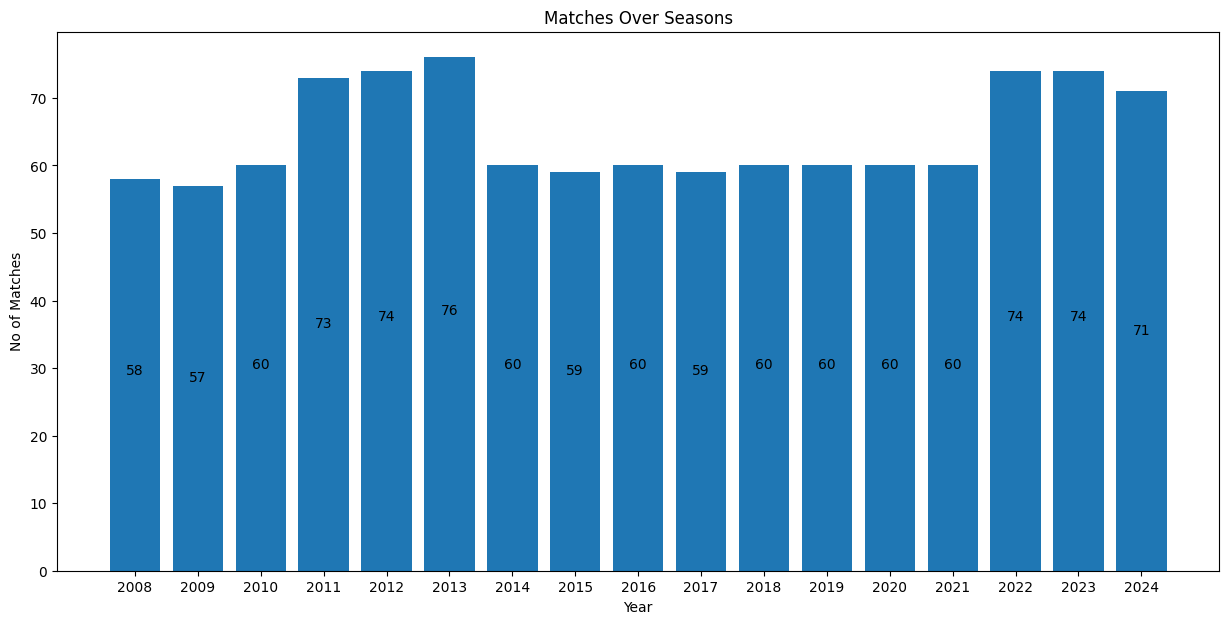

In [27]:
season_counts = matches_df['season'].value_counts().sort_index()
plt.figure(figsize=(15,7))
plt.bar(season_counts.index, season_counts.values)
plt.title("Matches Over Seasons")
plt.xlabel("Year")
plt.ylabel("No of Matches")
[plt.text(i, v//2, v, ha='center') for i, v in enumerate(season_counts.values)]

In [28]:
matches_df.pivot_table(index='season', columns='winner', aggfunc='size', fill_value=0)

winner,Chennai Super Kings,Delhi Capitals,Gujarat Titans,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Royal Challengers Bengaluru,Sunrisers Hyderabad
season,,,,,,,,,,,,
2008,9,7,0,0,6,0,7,10,13,0,4,2
2009,8,10,0,0,3,0,5,7,6,0,9,9
2010,9,7,0,0,7,0,11,4,6,0,8,8
2011,11,4,0,6,8,0,10,7,6,4,10,6
2012,10,11,0,0,12,0,10,8,7,4,8,4
2013,12,3,0,0,6,0,13,8,11,4,9,10
2014,10,2,0,0,11,0,7,12,7,0,5,6
2015,10,5,0,0,7,0,10,3,7,0,8,7
2016,0,7,9,0,8,0,7,4,0,5,9,11


Text(158.22222222222223, 0.5, 'Match Winner')

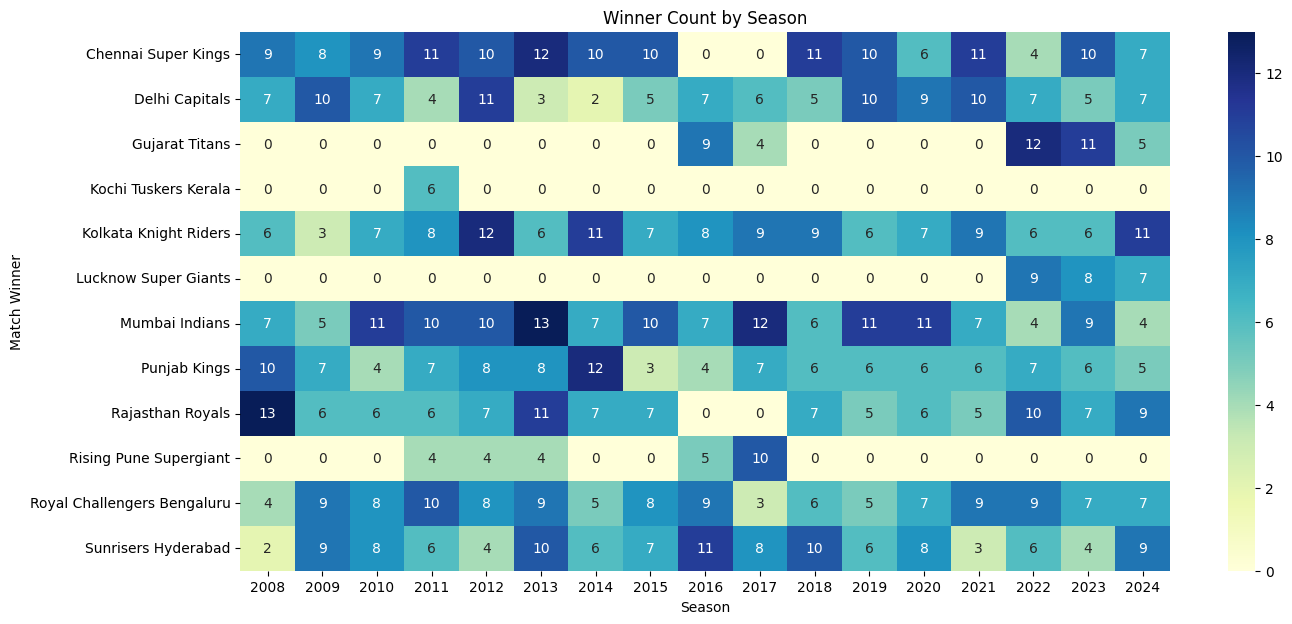

In [29]:
season_winnners = matches_df.pivot_table(index='winner', columns='season', aggfunc='size', fill_value=0)
plt.figure(figsize = (15,7))
plt.title('Winner Count by Season')
sns.heatmap(season_winnners, annot = True, cmap='YlGnBu')
plt.xlabel('Season')
plt.ylabel('Match Winner')

Text(0, 0.5, 'Toss Winner')

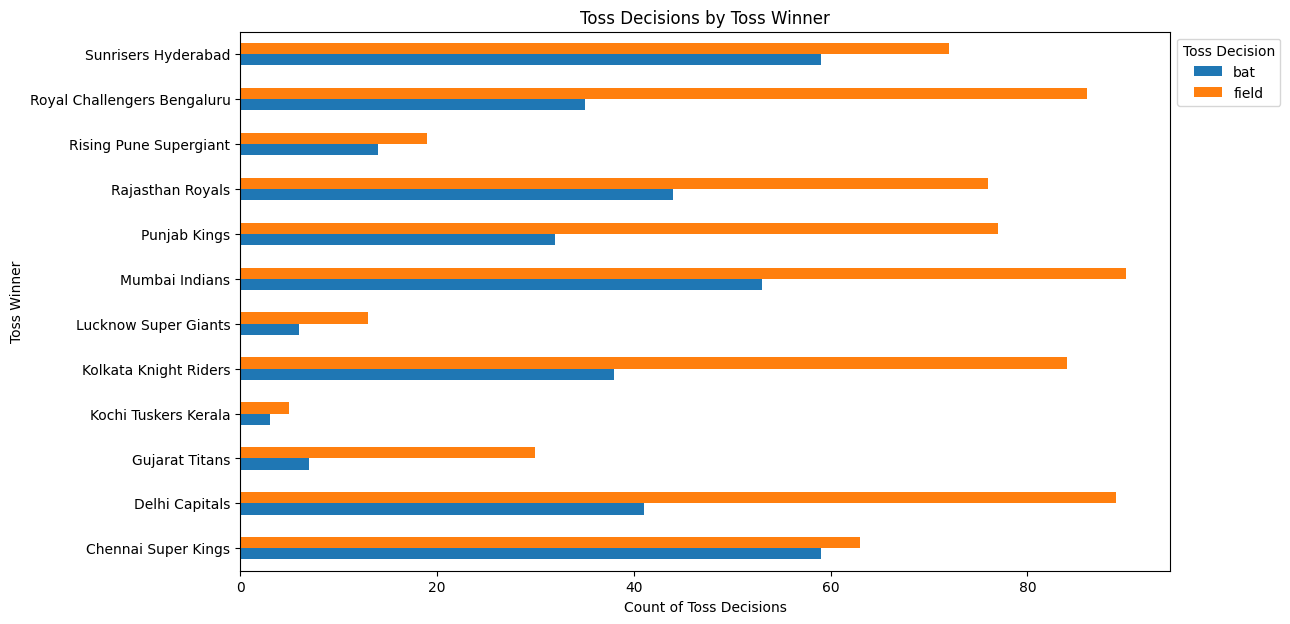

In [30]:
toss_decision = matches_df.pivot_table(index='toss_winner', columns='toss_decision', aggfunc='size', fill_value=0)
toss_decision.plot(kind='barh', figsize = (12,7), title="Toss Decisions by Toss Winner")
plt.legend(title='Toss Decision', bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Count of Toss Decisions')
plt.ylabel('Toss Winner')

Text(0, 0.5, 'Frequency')

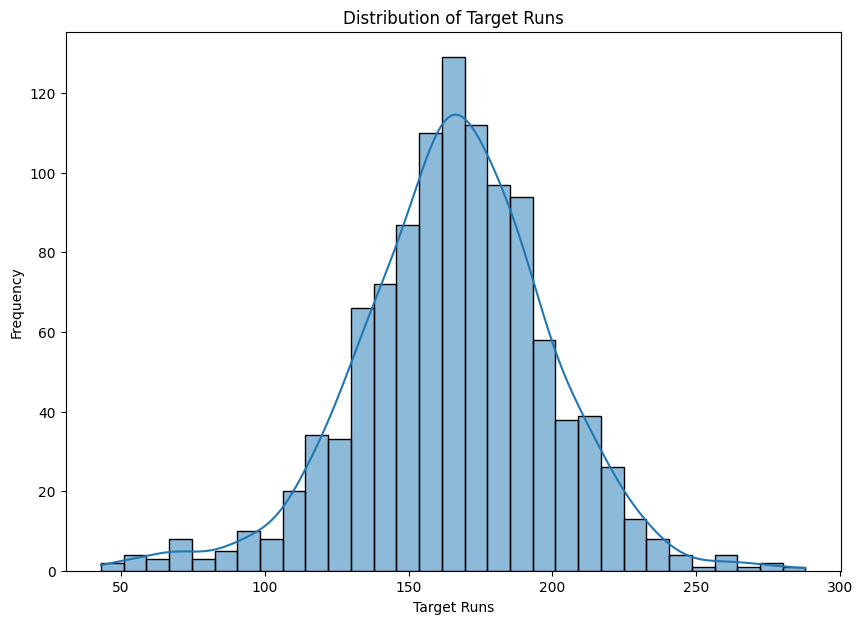

In [31]:
plt.figure(figsize = (10,7))
sns.histplot(matches_df['target_runs'], kde=True)
plt.title('Distribution of Target Runs')
plt.xlabel('Target Runs')
plt.ylabel('Frequency')

Text(0, 0.5, 'Average Target Runs')

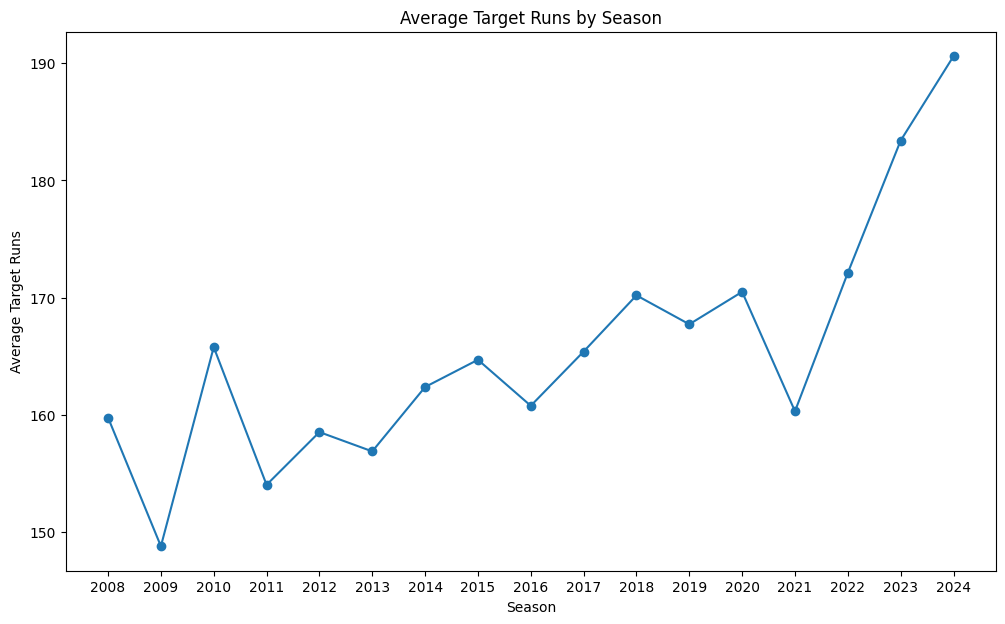

In [32]:
season_average = matches_df.pivot_table(index='season', values='target_runs', aggfunc='mean')
plt.figure(figsize = (12,7))
plt.plot(season_average,marker = 'o')
plt.title('Average Target Runs by Season')
plt.xlabel('Season')
plt.ylabel('Average Target Runs')

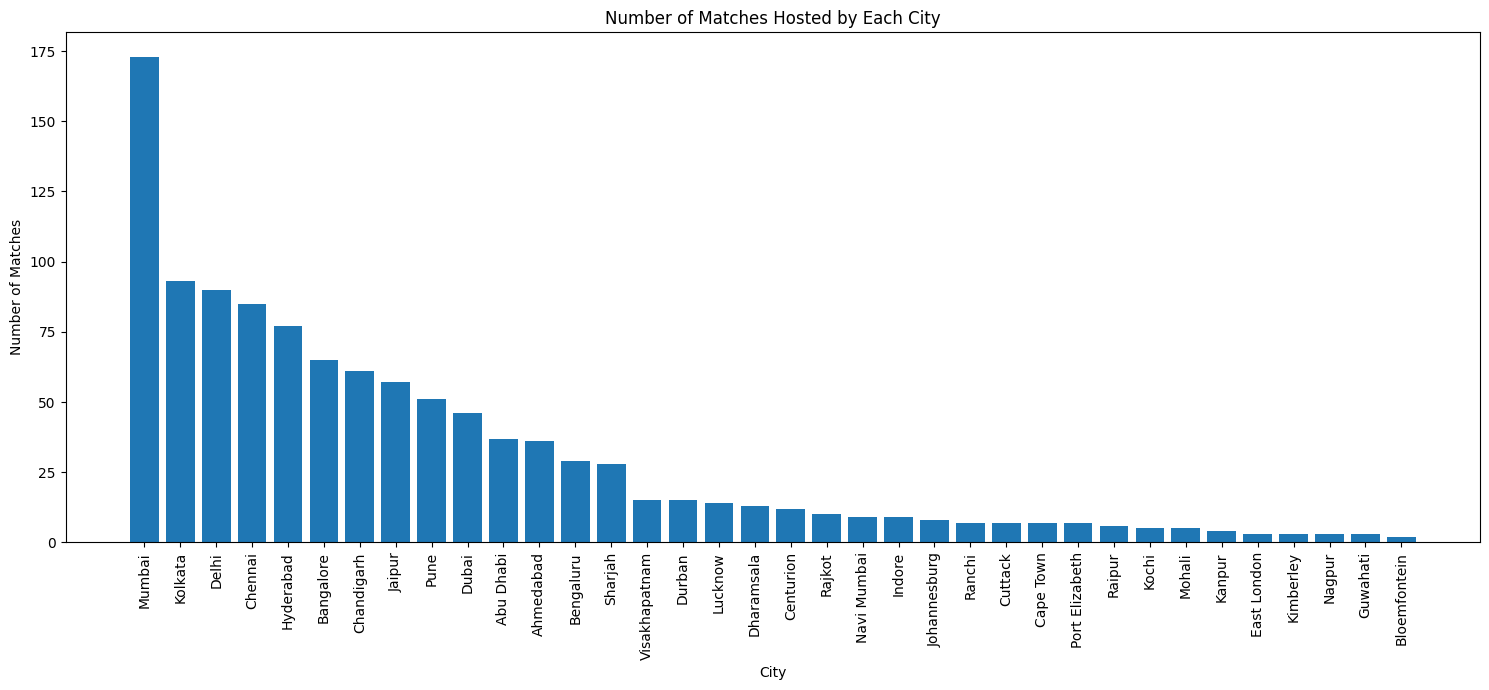

In [33]:
city_counts = matches_df['city'].value_counts()
plt.figure(figsize=(15, 7))
plt.bar(city_counts.index,city_counts.values)
plt.title('Number of Matches Hosted by Each City')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.tight_layout()

Text(0, 0.5, 'Frequency')

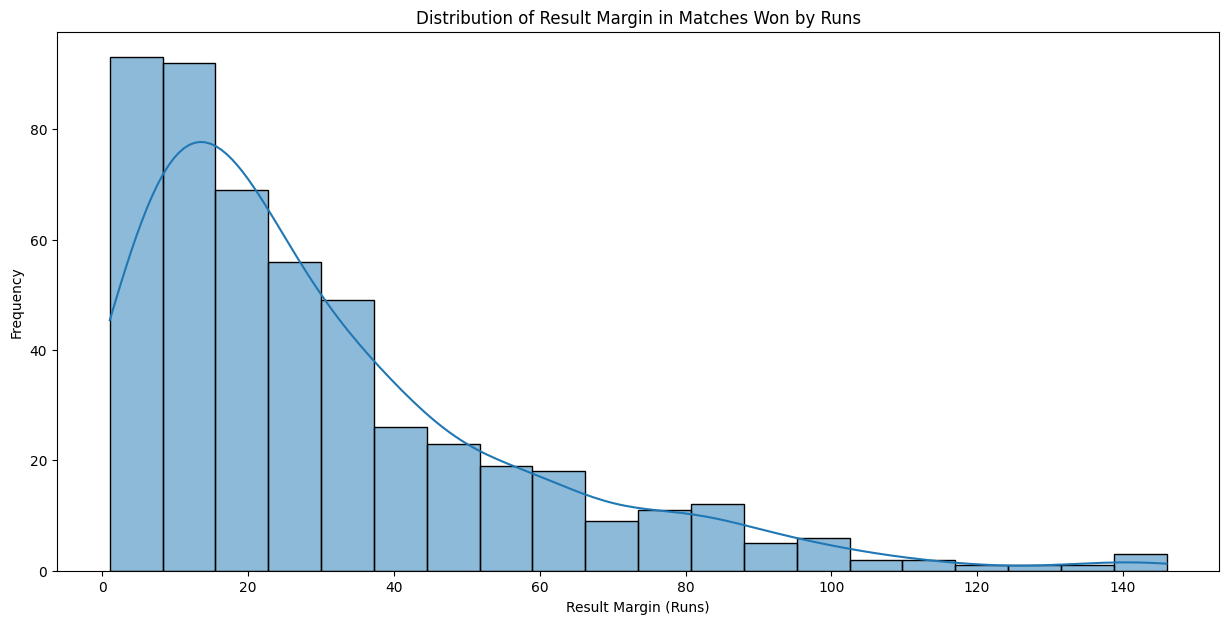

In [34]:
runs_margin = matches_df[matches_df['result'] == 'runs']['result_margin']
plt.figure(figsize=(15, 7))
sns.histplot(runs_margin, kde=True)
plt.title('Distribution of Result Margin in Matches Won by Runs')
plt.xlabel('Result Margin (Runs)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

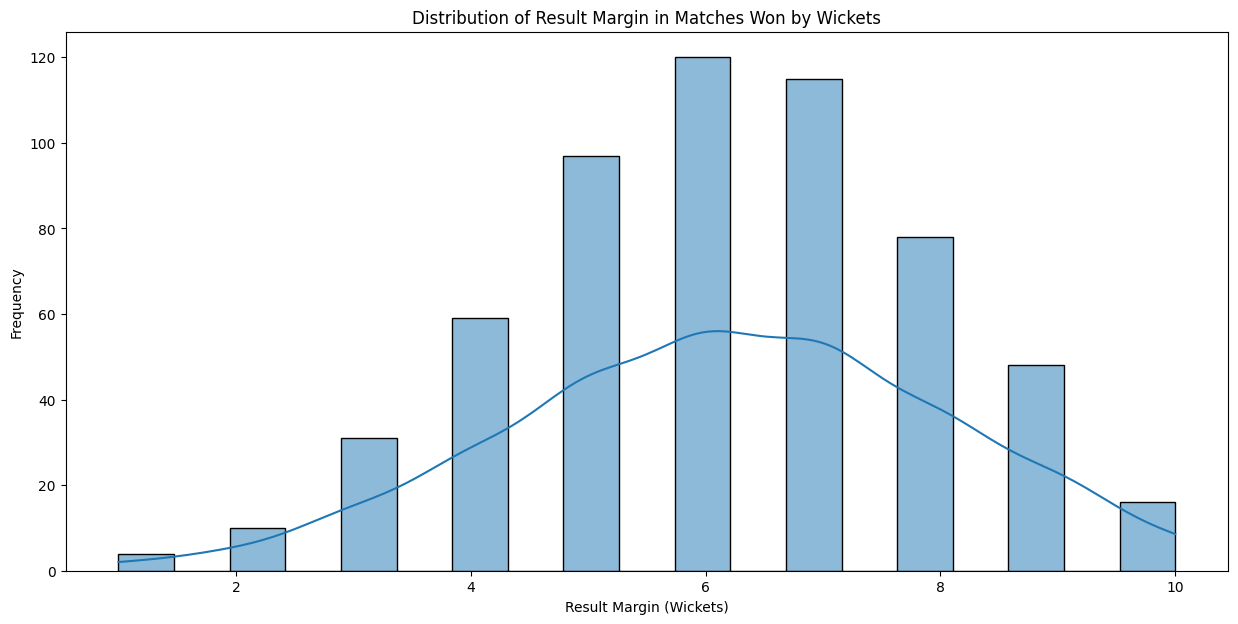

In [35]:
runs_margin = matches_df[matches_df['result'] == 'wickets']['result_margin']
plt.figure(figsize=(15, 7))
sns.histplot(runs_margin, kde=True)
plt.title('Distribution of Result Margin in Matches Won by Wickets')
plt.xlabel('Result Margin (Wickets)')
plt.ylabel('Frequency')

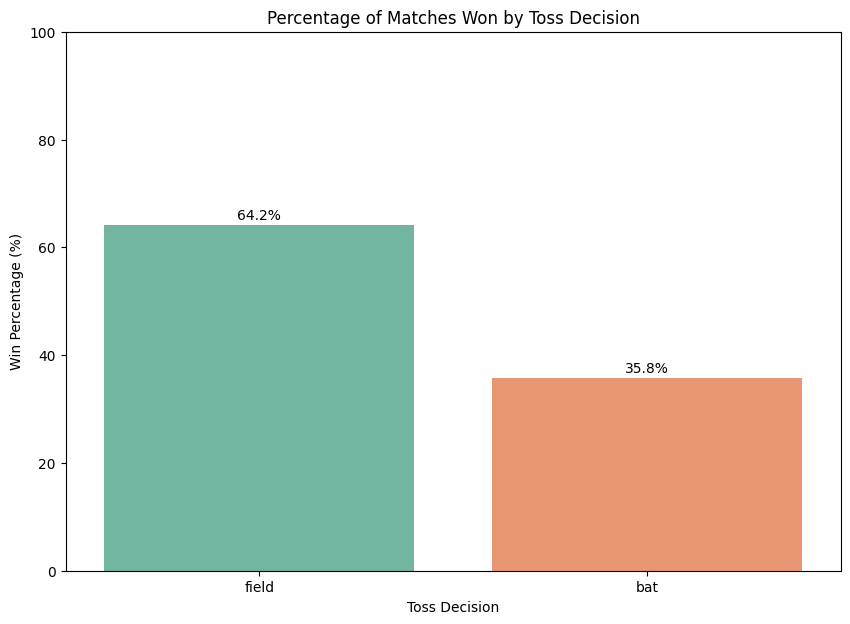

In [38]:
match_winner_df = matches_df.dropna(subset=['winner'])
wins = match_winner_df['toss_decision'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 7))
sns.barplot(x=wins.index, y=wins.values, hue=wins.index, palette='Set2', legend=False)
plt.ylim(0, 100)
plt.title('Percentage of Matches Won by Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Win Percentage (%)')
for i, v in enumerate(wins.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')

In [42]:
total_matches= (matches_df['team1'].value_counts() + matches_df['team2'].value_counts()).rename_axis('Team').reset_index(name="Total_Match_Played")
total_wins = matches_df['winner'].value_counts().rename_axis('Team').reset_index(name='Total_Wins')
team_chasing = matches_df[matches_df['toss_decision'] == 'field']['winner'].value_counts().rename_axis('Team').reset_index(name='Chasing_Wins')
team_batting_first = matches_df[matches_df['toss_decision'] == 'bat']['winner'].value_counts().rename_axis('Team').reset_index(name='Batting_First_Wins')
team_wins_merged_df = total_matches.merge(total_wins,on='Team',how='outer') \
    .merge(team_chasing, on='Team', how='outer') \
    .merge(team_batting_first, on='Team', how='outer')
team_wins_merged_df= team_wins_merged_df.fillna(0)
team_wins_merged_df.sort_values(by='Total_Wins', ascending=False, inplace=True)
team_wins_merged_df.set_index('Team').sort_values(by='Total_Wins', ascending=False)

,Total_Match_Played,Total_Wins,Chasing_Wins,Batting_First_Wins
Team,,,,
Mumbai Indians,261,144,90,54.0
Chennai Super Kings,238,138,75,63.0
Kolkata Knight Riders,251,131,81,50.0
Royal Challengers Bengaluru,255,123,85,38.0
Sunrisers Hyderabad,257,117,73,44.0
Delhi Capitals,252,115,73,42.0
Rajasthan Royals,221,112,69,43.0
Punjab Kings,246,112,84,28.0
Gujarat Titans,75,41,30,11.0


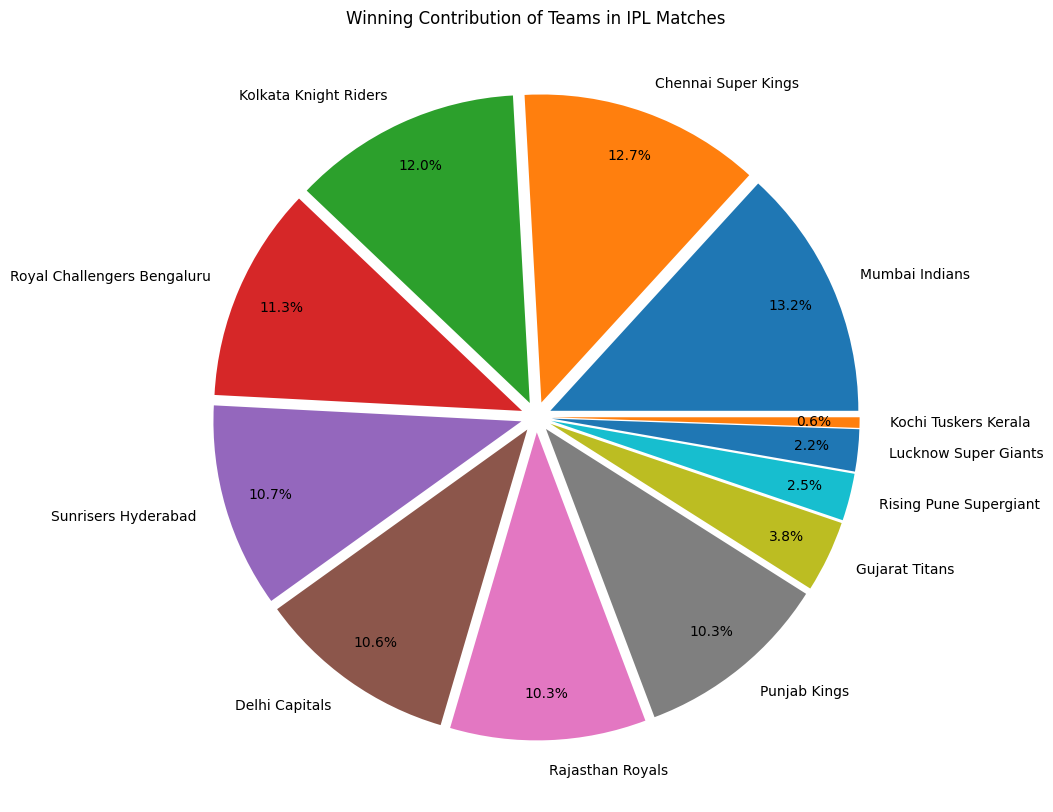

In [44]:
plt.figure(figsize=(10, 10))
plt.pie(
    team_wins_merged_df['Total_Wins'],
    labels=team_wins_merged_df['Team'],
    autopct='%1.1f%%',
    startangle=0,
    explode=[0.05] * len(team_wins_merged_df)  ,
    pctdistance=0.85,
    labeldistance=1.1
)
plt.title('Winning Contribution of Teams in IPL Matches')
plt.show()

In [45]:
team_wins_percentage_df = team_wins_merged_df.copy()
team_wins_percentage_df['Total_Wins'] = (team_wins_percentage_df['Total_Wins'] / team_wins_percentage_df['Total_Match_Played']) * 100
team_wins_percentage_df['Chasing_Wins'] = (team_wins_percentage_df['Chasing_Wins'] / team_wins_merged_df['Total_Wins']) * 100
team_wins_percentage_df['Batting_First_Wins'] = (team_wins_percentage_df['Batting_First_Wins'] / team_wins_merged_df['Total_Wins']) * 100
team_wins_percentage_df.set_index('Team').sort_values(by='Total_Wins', ascending=False)

,Total_Match_Played,Total_Wins,Chasing_Wins,Batting_First_Wins
Team,,,,
Chennai Super Kings,238,57.983193,54.347826,45.652174
Mumbai Indians,261,55.172414,62.500000,37.500000
Gujarat Titans,75,54.666667,73.170732,26.829268
Lucknow Super Giants,44,54.545455,75.000000,25.000000
Kolkata Knight Riders,251,52.191235,61.832061,38.167939
Rajasthan Royals,221,50.678733,61.607143,38.392857
Royal Challengers Bengaluru,255,48.235294,69.105691,30.894309
Delhi Capitals,252,45.634921,63.478261,36.521739
Punjab Kings,246,45.528455,75.000000,25.000000


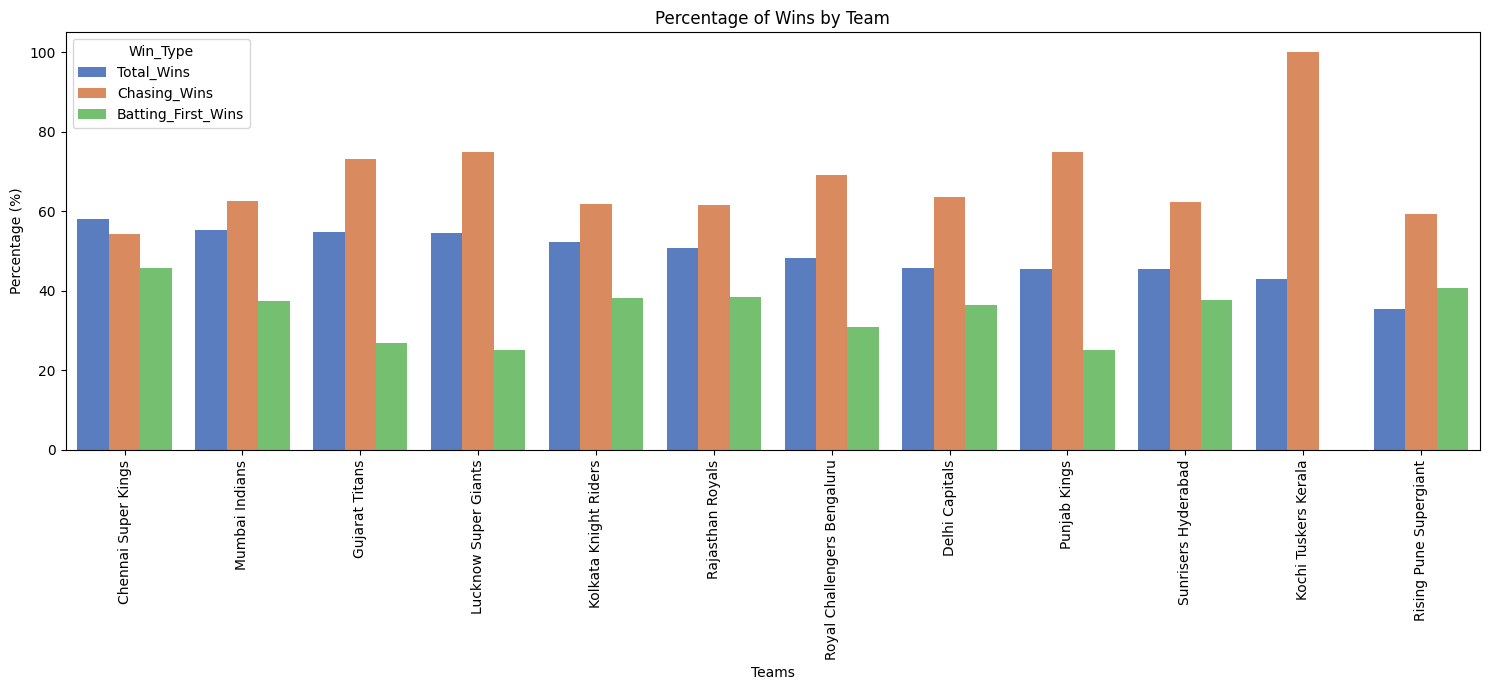

In [46]:
team_wins_percentage_melted_df = team_wins_percentage_df.sort_values(by='Total_Wins', ascending=False).melt(id_vars='Team',
                                value_vars=['Total_Wins', 'Chasing_Wins', 'Batting_First_Wins'],
                                var_name='Win_Type',
                                value_name='Percentage')
plt.figure(figsize=(15, 7))
sns.barplot(data=team_wins_percentage_melted_df, x='Team', y='Percentage', hue='Win_Type', palette='muted')
plt.xlabel('Teams')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Wins by Team')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [47]:
total_matches= (matches_df['team1'].value_counts()+matches_df['team2'].value_counts()).rename_axis('Team').reset_index(name="Total_Match_Played")
toss_winners=matches_df['toss_winner'].value_counts().rename_axis('Team').reset_index(name='Toss_Win')
team_wins_pivot = pd.pivot_table(
    data=matches_df[matches_df['toss_winner'] == matches_df['winner']],
    index='winner',
    columns='toss_decision',
    aggfunc='size',
    fill_value=0
).rename_axis('Team').reset_index().rename(columns={'bat': 'Bat_first_win_After_Toss_Win','field':'Chasing_Win_After_Toss_Win'})
toss_winner_matches = matches_df[matches_df['toss_winner'] == matches_df['winner']]['winner'].value_counts().rename_axis('Team').reset_index(name='Toss_Win_Match_win')
team_toss_wins_merged_df = total_matches.merge(toss_winners, on='Team', how='outer') \
    .merge(toss_winner_matches, on='Team', how='outer') \
    .merge(team_wins_pivot, on='Team', how='outer')
team_toss_wins_merged_df= team_toss_wins_merged_df.fillna(0)
team_toss_wins_merged_df.sort_values(by='Toss_Win_Match_win', ascending=False, inplace=True)
team_toss_wins_merged_df.set_index('Team').sort_values(by='Toss_Win_Match_win', ascending=False)

,Total_Match_Played,Toss_Win,Toss_Win_Match_win,Bat_first_win_After_Toss_Win,Chasing_Win_After_Toss_Win
Team,,,,,
Mumbai Indians,261,143,78,30,48
Chennai Super Kings,238,122,75,35,40
Kolkata Knight Riders,251,122,68,20,48
Delhi Capitals,252,130,61,18,43
Royal Challengers Bengaluru,255,121,61,17,44
Rajasthan Royals,221,120,60,18,42
Sunrisers Hyderabad,257,131,57,23,34
Punjab Kings,246,109,45,6,39
Gujarat Titans,75,37,24,3,21


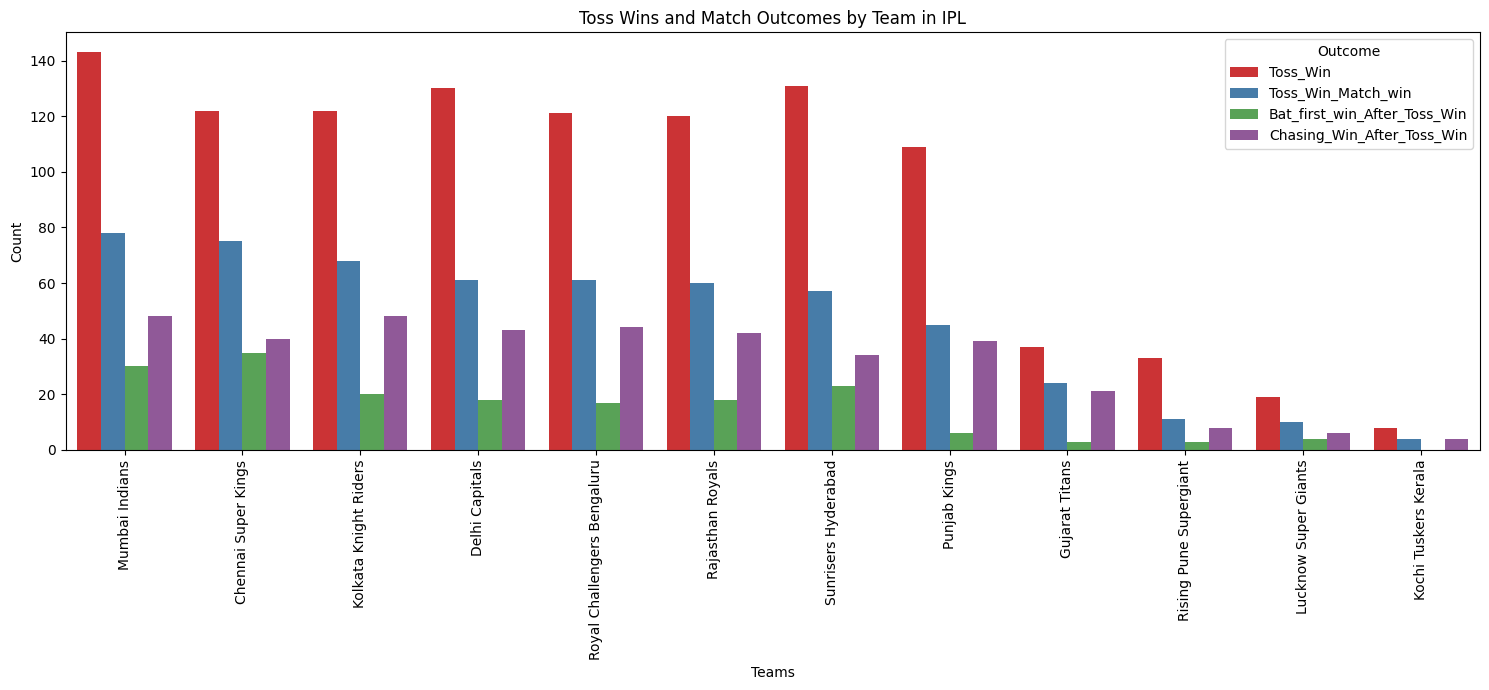

In [48]:
team_toss_wins_melted_df = pd.melt(
    team_toss_wins_merged_df,
    id_vars=['Team'],
    value_vars=['Toss_Win', 'Toss_Win_Match_win', 'Bat_first_win_After_Toss_Win', 'Chasing_Win_After_Toss_Win'],
    var_name='Outcome',
    value_name='Count'
)
plt.figure(figsize=(15, 7))
sns.barplot(data=team_toss_wins_melted_df, x='Team', y='Count', hue='Outcome', palette='Set1')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title('Toss Wins and Match Outcomes by Team in IPL')
plt.legend(title='Outcome')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

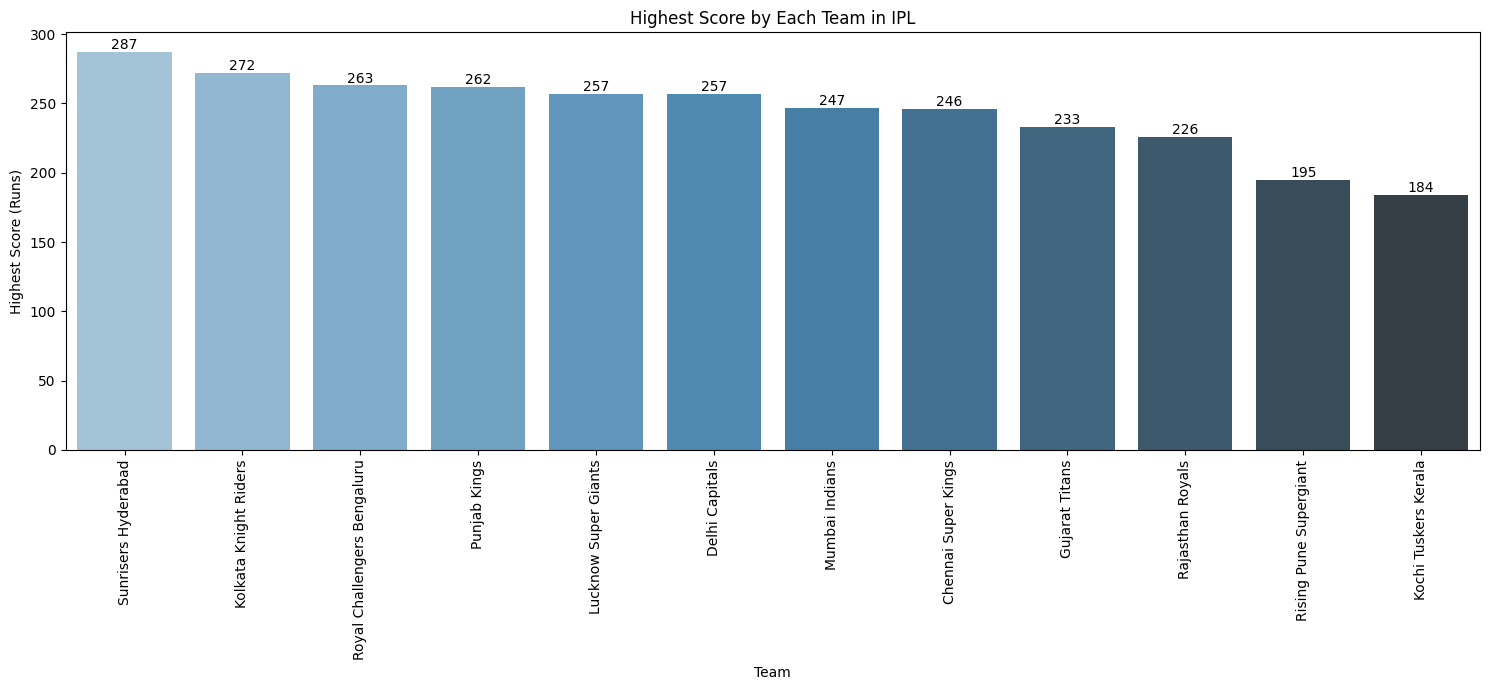

In [51]:
deliveries_pivot_table = pd.pivot_table(
    data=deliveries_df,
    index='match_id',
    columns='batting_team',
    values='total_runs',
    aggfunc='sum',
    fill_value=0
)
deliveries_melted_df = deliveries_pivot_table.reset_index().melt(id_vars='match_id', var_name='batting_team', value_name='total_runs')
deliveries_filtered_df = deliveries_melted_df[deliveries_melted_df['total_runs'] > 0]
deliveries_filtered_df.reset_index(drop=True, inplace=True)
highest_scores = deliveries_filtered_df.groupby('batting_team')['total_runs'].max().reset_index()
highest_scores_sorted = highest_scores.sort_values(by='total_runs', ascending=False).reset_index(drop=True)
plt.figure(figsize=(15, 7))
sns.barplot(x='batting_team', y='total_runs', data=highest_scores_sorted, hue='batting_team', palette='Blues_d', legend=False)
for index, value in enumerate(highest_scores_sorted['total_runs']):
    plt.text(index, value + 2, f'{value}', ha='center')
plt.xlabel('Team')
plt.ylabel('Highest Score (Runs)')
plt.title('Highest Score by Each Team in IPL')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

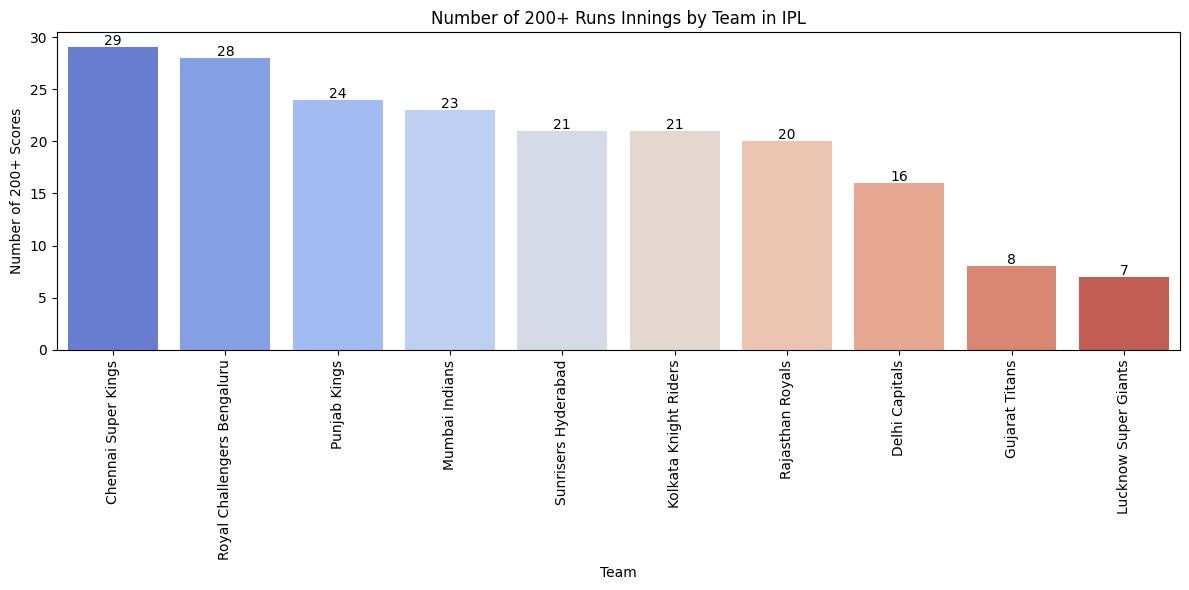

In [52]:
high_scores_df = deliveries_filtered_df[deliveries_filtered_df['total_runs'] > 200]
team_200_plus_count = high_scores_df.groupby('batting_team')['total_runs'].count().reset_index()
team_200_plus_count.columns = ['Team', '200+ Runs Count']
team_200_plus_count_sorted = team_200_plus_count.sort_values(by='200+ Runs Count', ascending=False).reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='200+ Runs Count', data=team_200_plus_count_sorted, hue='Team', palette='coolwarm', legend=False)
for index, value in enumerate(team_200_plus_count_sorted['200+ Runs Count']):
    plt.text(index, value + 0.2, str(value), ha='center')
plt.xlabel('Team')
plt.ylabel('Number of 200+ Scores')
plt.title('Number of 200+ Runs Innings by Team in IPL')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

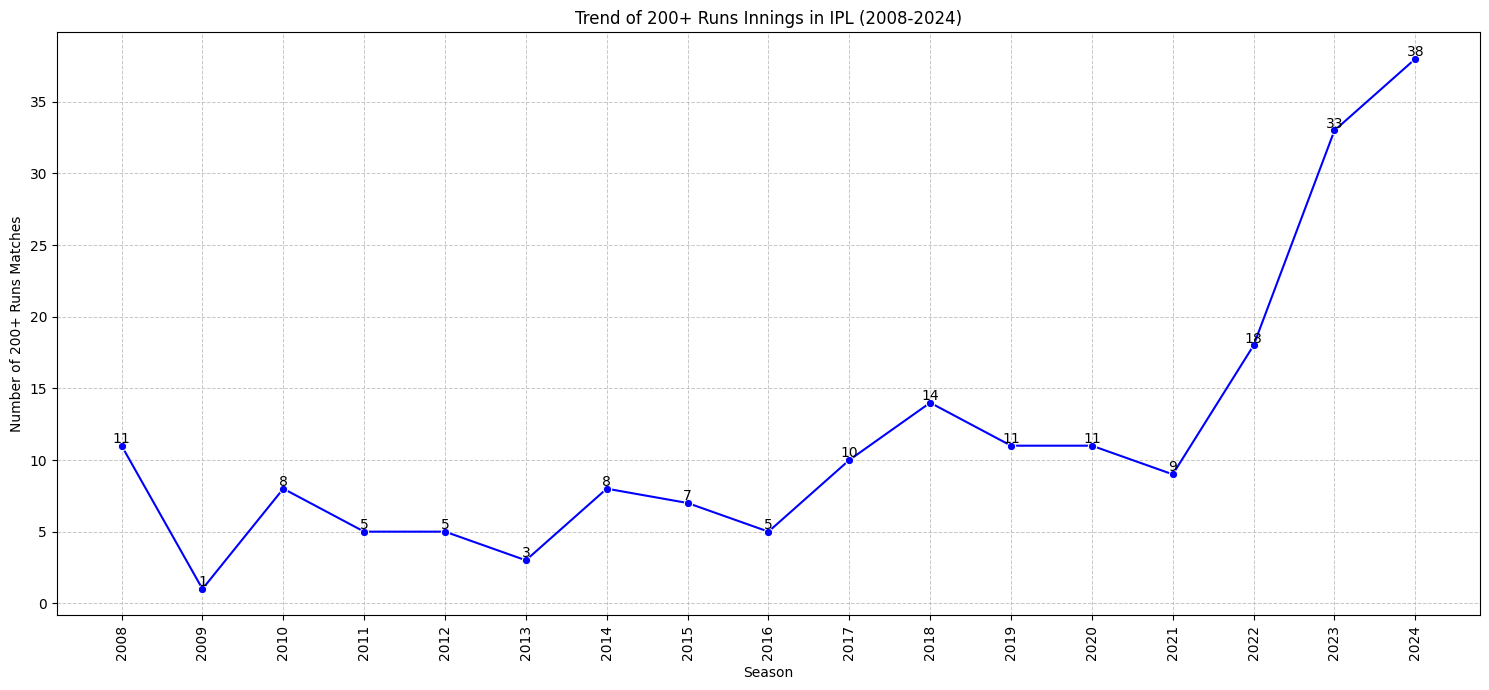

In [53]:
season_df= matches_df[['id','season']]
season_merged= pd.merge(season_df, deliveries_filtered_df, left_on='id', right_on='match_id',how='inner')
season_merged_filtter= season_merged[season_merged['total_runs']>200]
seasonwise200= season_merged_filtter.groupby('season')['total_runs'].count()
seasonwise200_sorted = seasonwise200.sort_index()
plt.figure(figsize=(15, 7))
sns.lineplot(x=seasonwise200_sorted.index, y=seasonwise200_sorted.values, marker='o', color='b')
for index, value in enumerate(seasonwise200_sorted.values):
    plt.text(index, value + 0.2, str(value), ha='center')
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.xlabel('Season')
plt.ylabel('Number of 200+ Runs Matches')
plt.title('Trend of 200+ Runs Innings in IPL (2008-2024)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

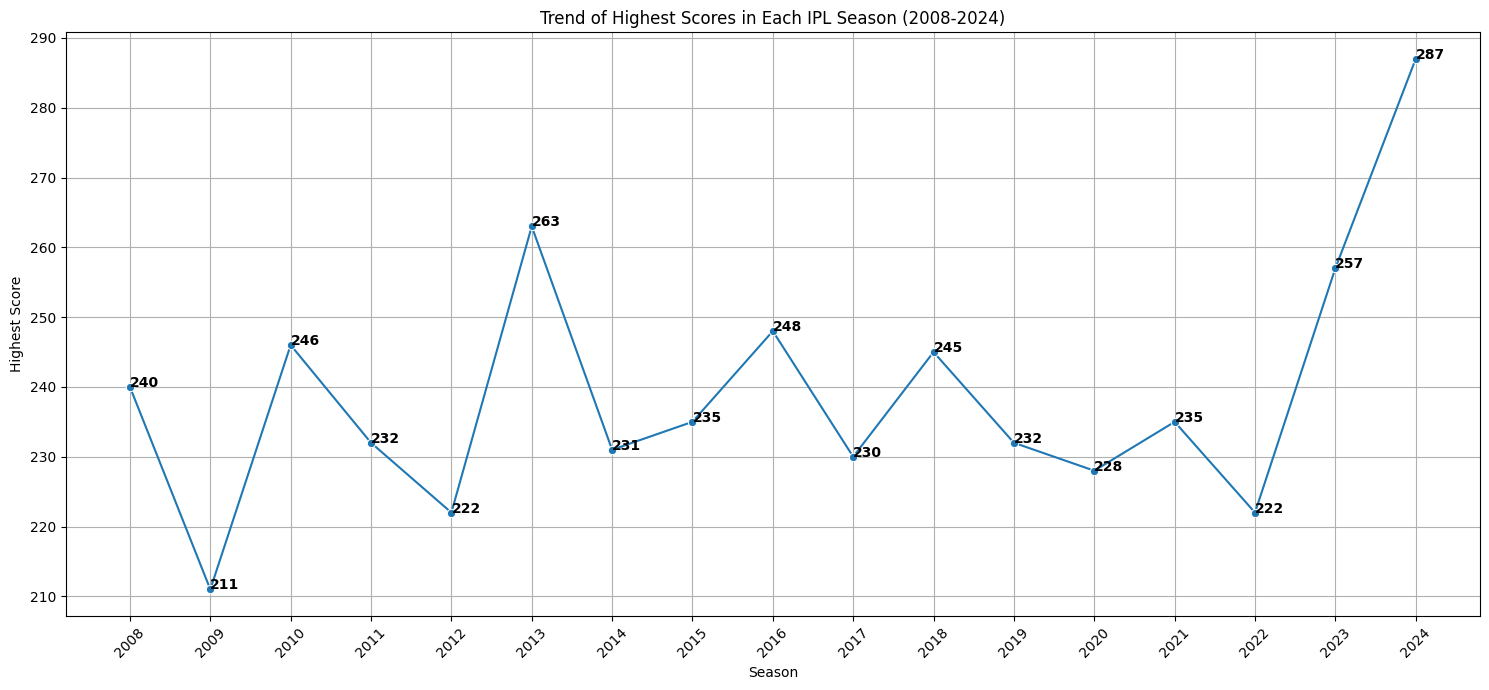

In [54]:
seasonwise_maxscore= season_merged_filtter[['season','total_runs']]
seasonwise_maxscore =seasonwise_maxscore.groupby('season')['total_runs'].max().reset_index()
plt.figure(figsize=(15, 7))
sns.lineplot(data=seasonwise_maxscore, x='season', y='total_runs', marker='o')
for index, row in seasonwise_maxscore.iterrows():
    plt.text(row['season'], row['total_runs'], row['total_runs'],
             horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('Trend of Highest Scores in Each IPL Season (2008-2024)')
plt.xlabel('Season')
plt.ylabel('Highest Score')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

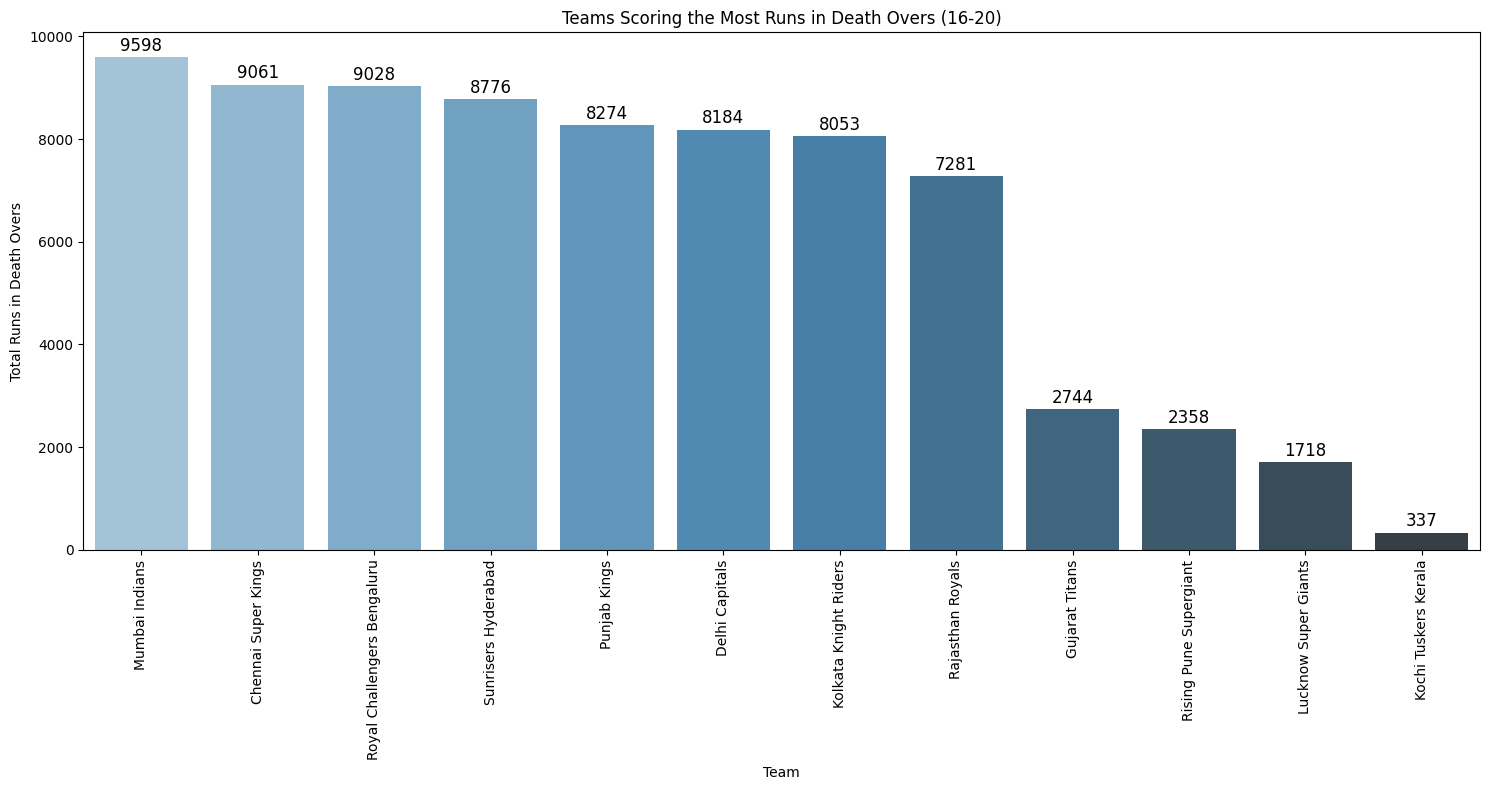

In [56]:
death_overs = deliveries_df[(deliveries_df['over'] >= 16) & (deliveries_df['over'] <= 20)]
team_runs = death_overs.groupby('batting_team')['total_runs'].sum().reset_index(name='death_over_runs')
top_teams = team_runs.sort_values(by='death_over_runs', ascending=False)
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='batting_team', y='death_over_runs', data=top_teams, palette='Blues_d', hue='batting_team', legend=False)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8),
                textcoords='offset points')
plt.title('Teams Scoring the Most Runs in Death Overs (16-20)')
plt.xlabel('Team')
plt.ylabel('Total Runs in Death Overs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [61]:
# Filter death overs data
death_overs = deliveries_df[(deliveries_df['over'] >= 16) & (deliveries_df['over'] <= 20)]
# Calculate runs and valid balls (excluding wides/noballs)
runs = death_overs.groupby('batting_team')['total_runs'].sum()
balls = death_overs[~death_overs['extras_type'].isin(['wides', 'noballs'])].groupby('batting_team')['ball'].count()
# Compute strike rate
team_stats = pd.DataFrame({'death_over_runs': runs, 'balls_faced': balls})
team_stats['strike_rate'] = (team_stats['death_over_runs'] / team_stats['balls_faced']) * 100
# Add wickets lost
wickets = death_overs[death_overs['is_wicket'] == 1].groupby('batting_team')['is_wicket'].count()
team_stats['wickets_lost'] = wickets
team_stats.fillna(0, inplace=True)
# Sort by strike rate
team_stats = team_stats.sort_values(by='strike_rate', ascending=False).reset_index()

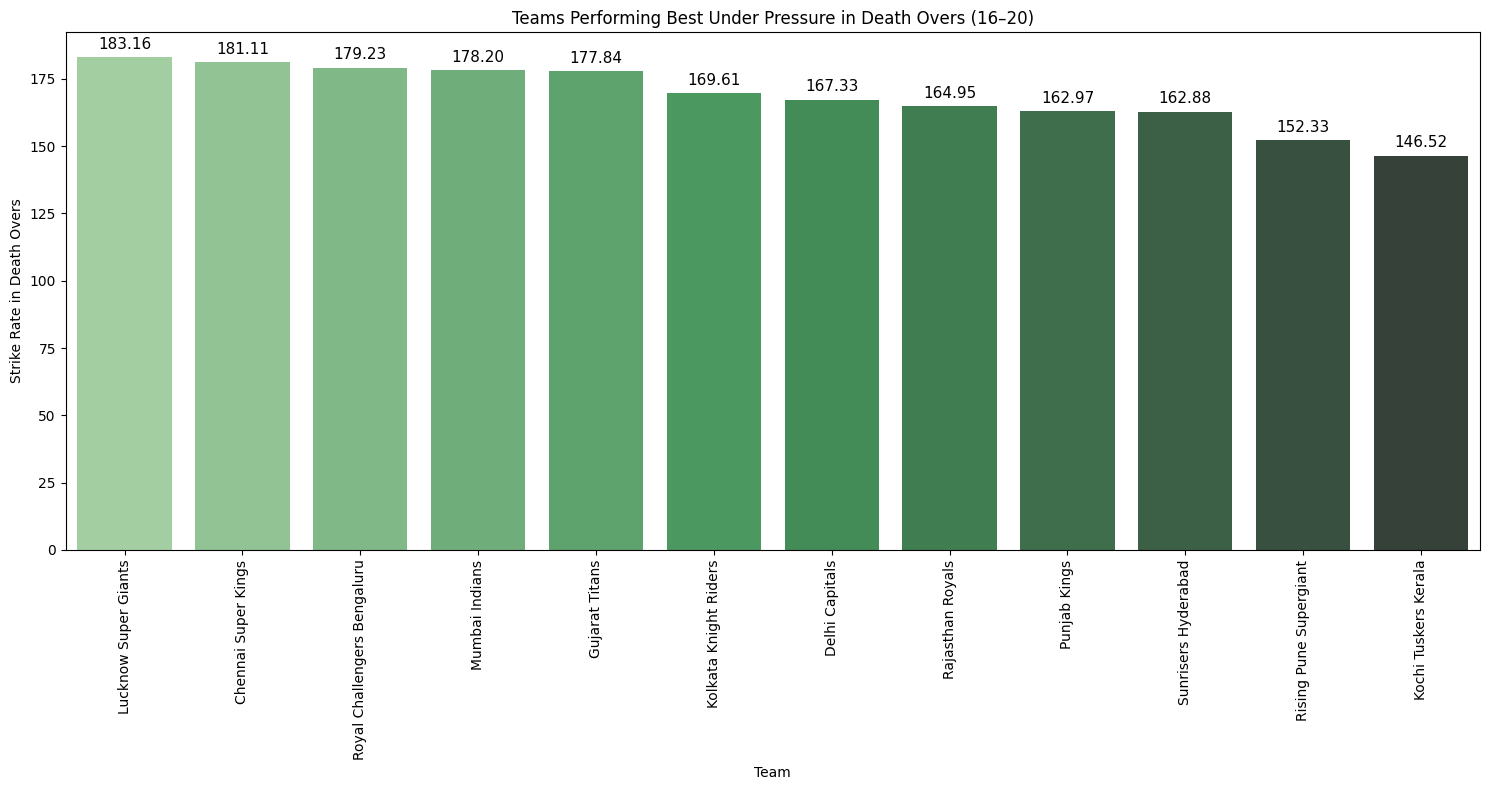

In [63]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=team_stats, x='batting_team', y='strike_rate', hue='batting_team', palette='Greens_d', legend=False)
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
            f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=11)
plt.title('Teams Performing Best Under Pressure in Death Overs (16–20)')
plt.xlabel('Team')
plt.ylabel('Strike Rate in Death Overs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

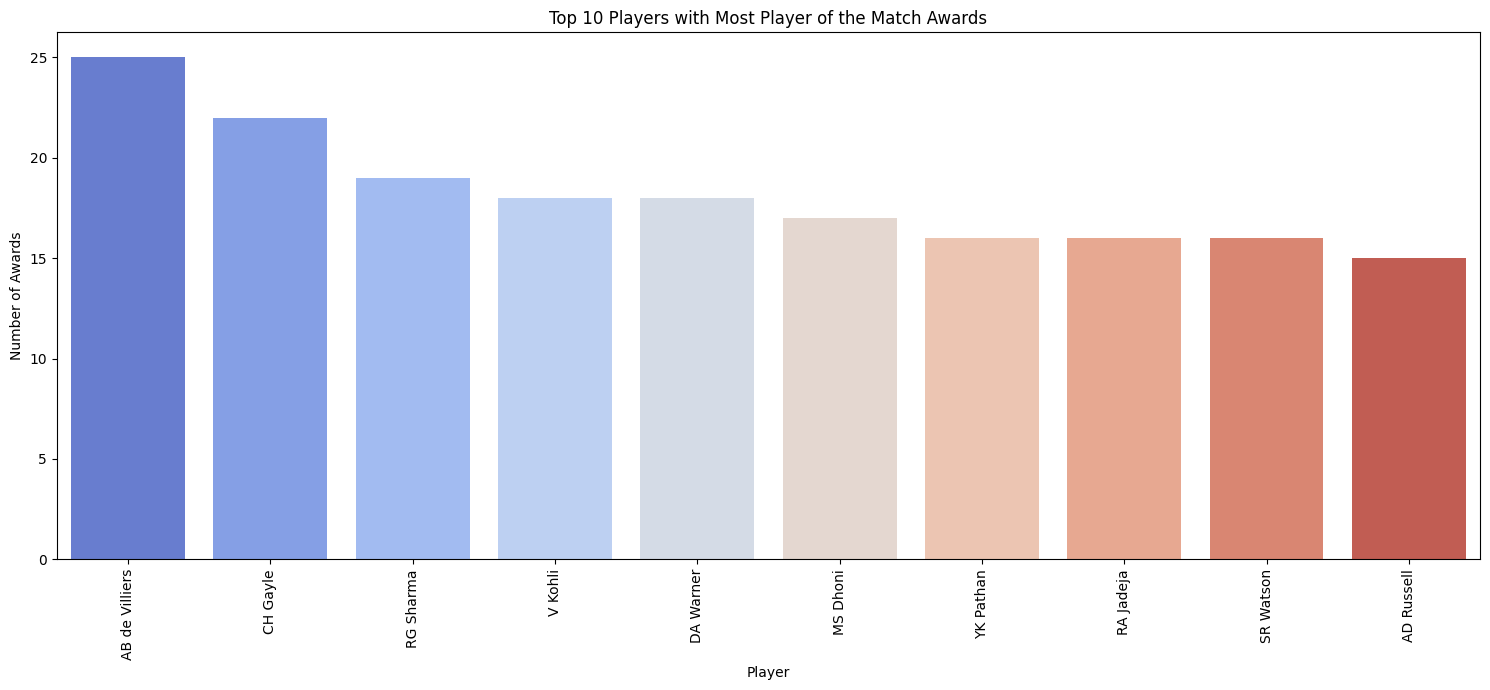

In [64]:
matches_df['player_of_match'].value_counts().head()
player_counts = matches_df['player_of_match'].value_counts().head(10)
plt.figure(figsize=(15, 7))
sns.barplot(x=player_counts.index, y=player_counts.values, hue=player_counts.index, palette='coolwarm', legend=False)
plt.title('Top 10 Players with Most Player of the Match Awards')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

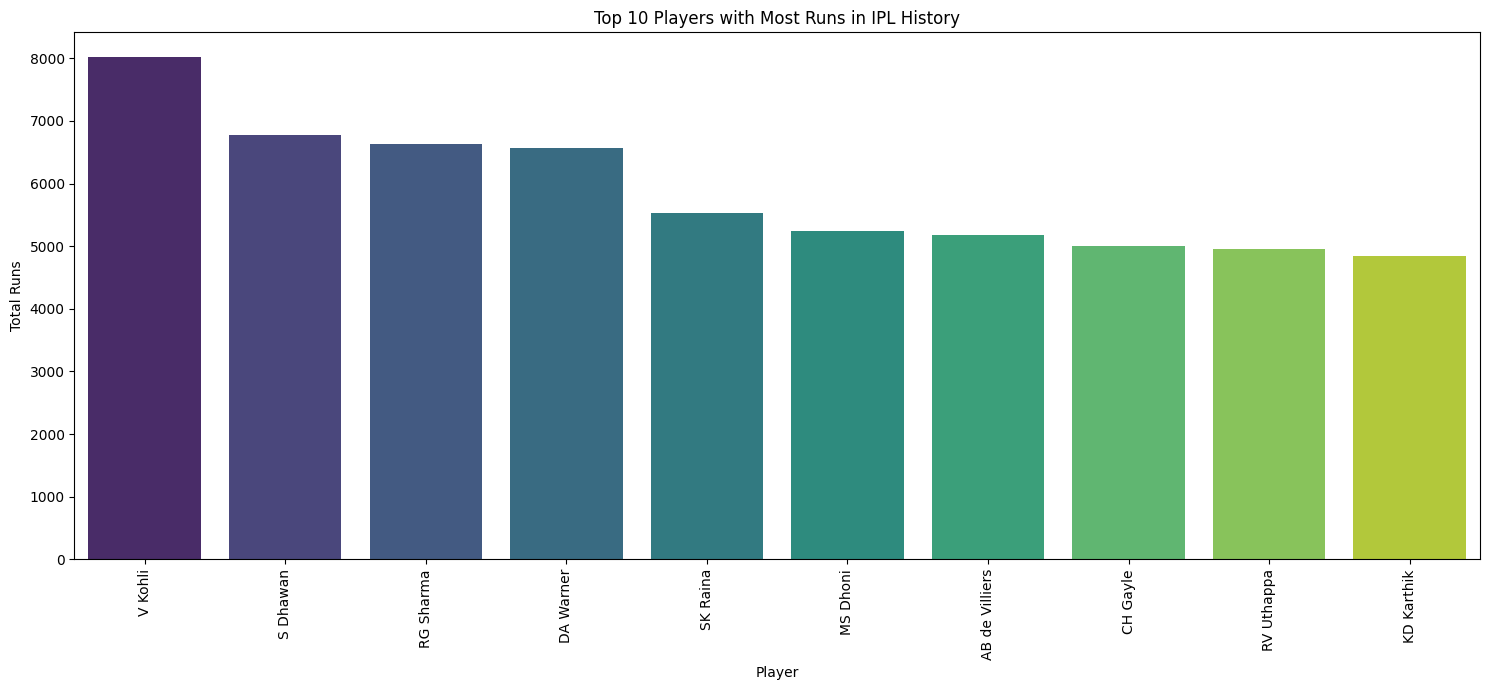

In [67]:
player_runs = deliveries_df[['batter', 'batsman_runs']]
player_runs = player_runs.groupby('batter')['batsman_runs'].sum().reset_index(name='total_runs')
top_players = player_runs.sort_values(by='total_runs', ascending=False).head(10)
plt.figure(figsize=(15, 7))
bar_plot = sns.barplot(data=top_players, x='batter', y='total_runs', hue='batter', palette='viridis', legend=False)
plt.title('Top 10 Players with Most Runs in IPL History')
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

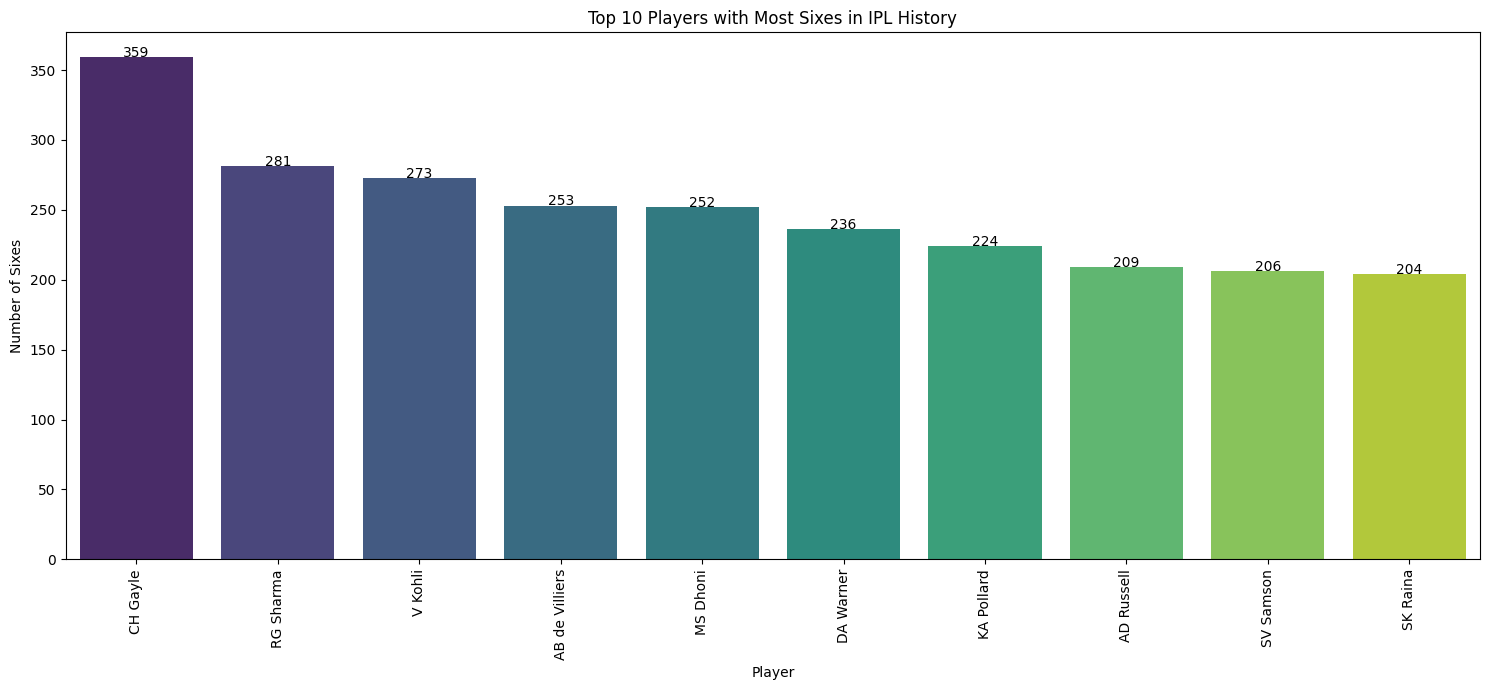

In [68]:
most_sixes = deliveries_df[deliveries_df['batsman_runs'] == 6]['batter'].value_counts().head(10)
most_sixes_df = most_sixes.reset_index()
most_sixes_df.columns = ['batter', 'sixes']
plt.figure(figsize=(15, 7))
bar_plot = sns.barplot(data=most_sixes_df, x='batter', y='sixes', hue='batter', palette='viridis', legend=False)
for index, row in most_sixes_df.iterrows():
    bar_plot.text(index, row.sixes + 0.1, row.sixes, color='black', ha="center")
plt.title('Top 10 Players with Most Sixes in IPL History')
plt.xlabel('Player')
plt.ylabel('Number of Sixes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

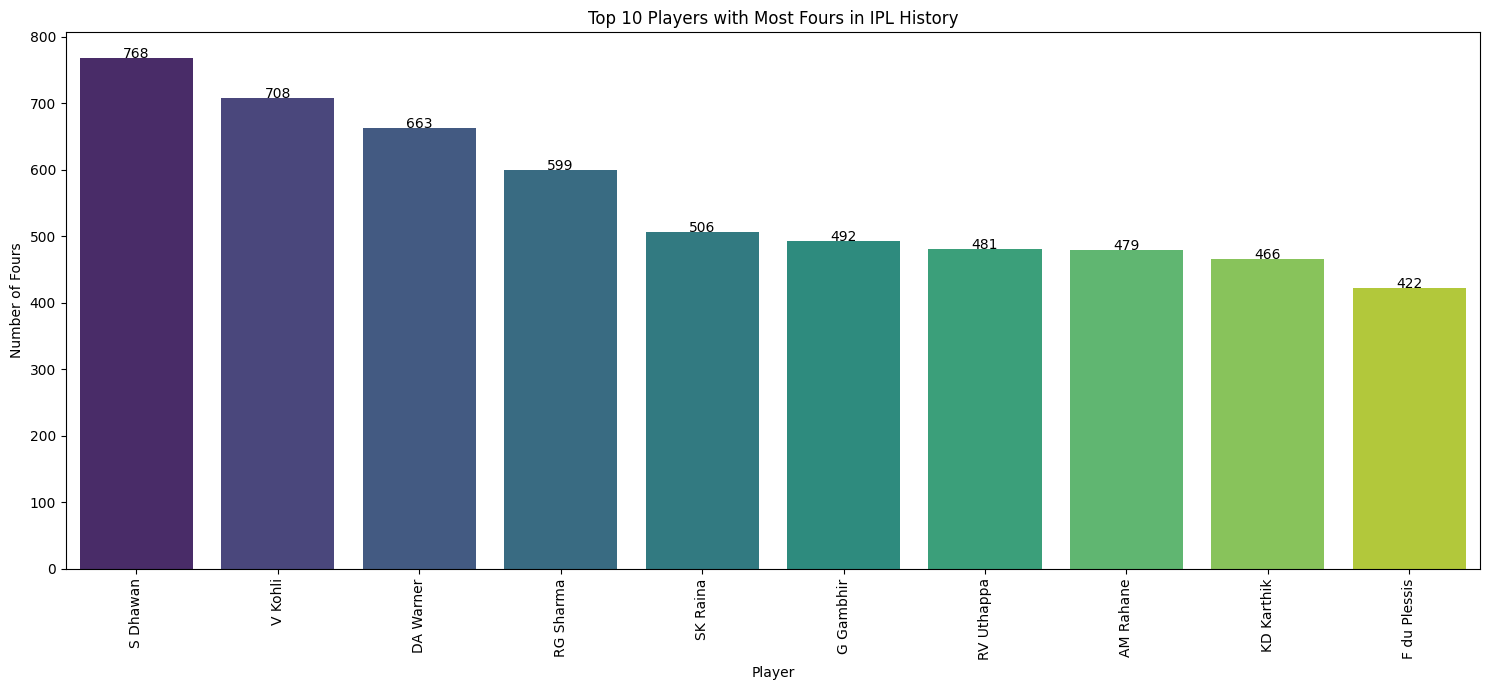

In [69]:
most_fours = deliveries_df[deliveries_df['batsman_runs'] == 4]['batter'].value_counts().head(10)
most_fours_df = most_fours.reset_index()
most_fours_df.columns = ['batter', 'fours']
plt.figure(figsize=(15, 7))
bar_plot = sns.barplot(data=most_fours_df, x='batter', y='fours', hue='batter', palette='viridis', legend=False)
for index, row in most_fours_df.iterrows():
    bar_plot.text(index, row.fours + 0.1, row.fours, color='black', ha="center")
plt.title('Top 10 Players with Most Fours in IPL History')
plt.xlabel('Player')
plt.ylabel('Number of Fours')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

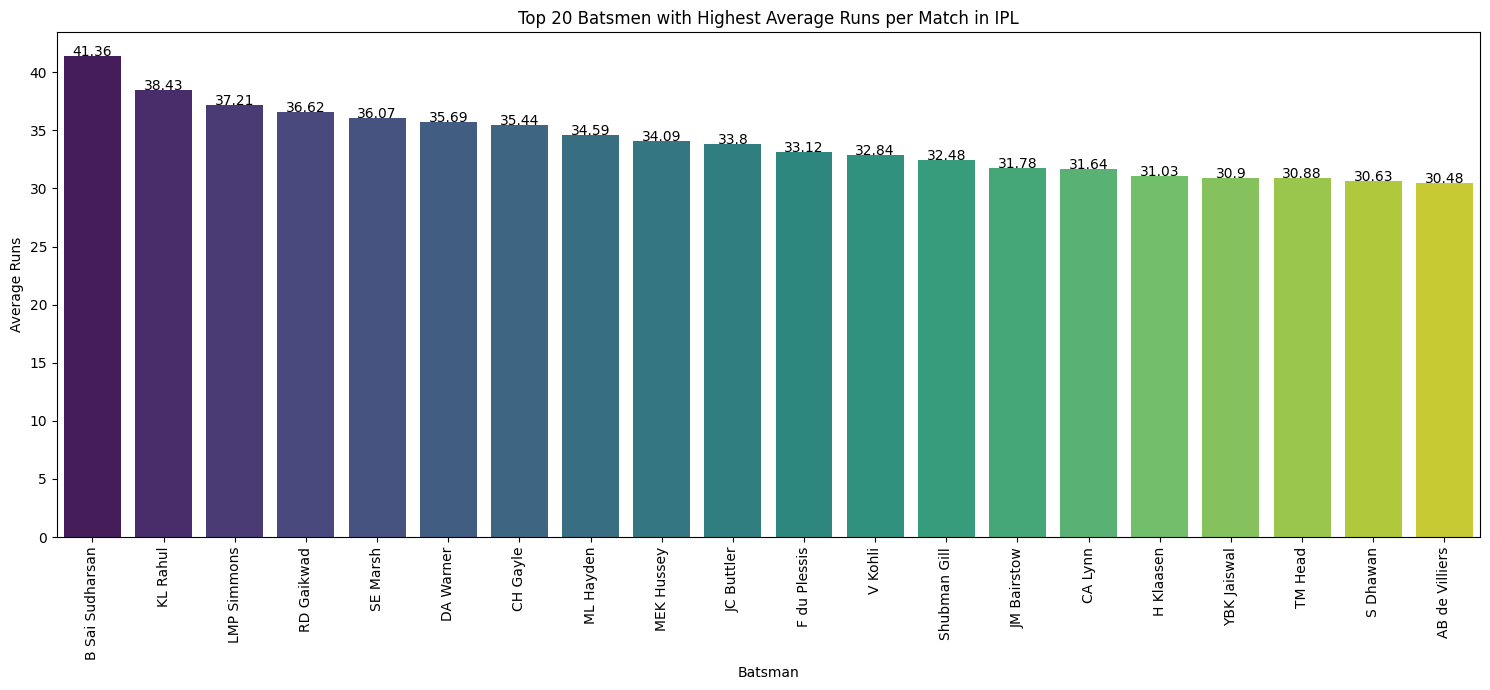

In [70]:
batter_data= deliveries_df[['match_id','batter','batsman_runs']]
batter_matches = batter_data.groupby('batter')['match_id'].nunique().reset_index(name='matches_played')
batter_total_runs = batter_data.groupby('batter')['batsman_runs'].sum().reset_index(name='total_runs')
batter_summary = pd.merge(batter_matches, batter_total_runs, on='batter')
batter_summary['Avg_runs'] = batter_summary['total_runs'] / batter_summary['matches_played']
batter_summary = batter_summary[batter_summary['matches_played']>=25]
batter_avg = batter_summary.sort_values(by='Avg_runs', ascending=False).reset_index(drop=True)
plt.figure(figsize=(15, 7))
bar_plot = sns.barplot(data=batter_avg.head(20), x='batter', y='Avg_runs', hue='batter', palette='viridis', legend=False)
for index, row in batter_avg.head(20).iterrows():
    bar_plot.text(index, row.Avg_runs, round(row.Avg_runs, 2), color='black', ha="center")
plt.title('Top 20 Batsmen with Highest Average Runs per Match in IPL')
plt.xlabel('Batsman')
plt.ylabel('Average Runs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

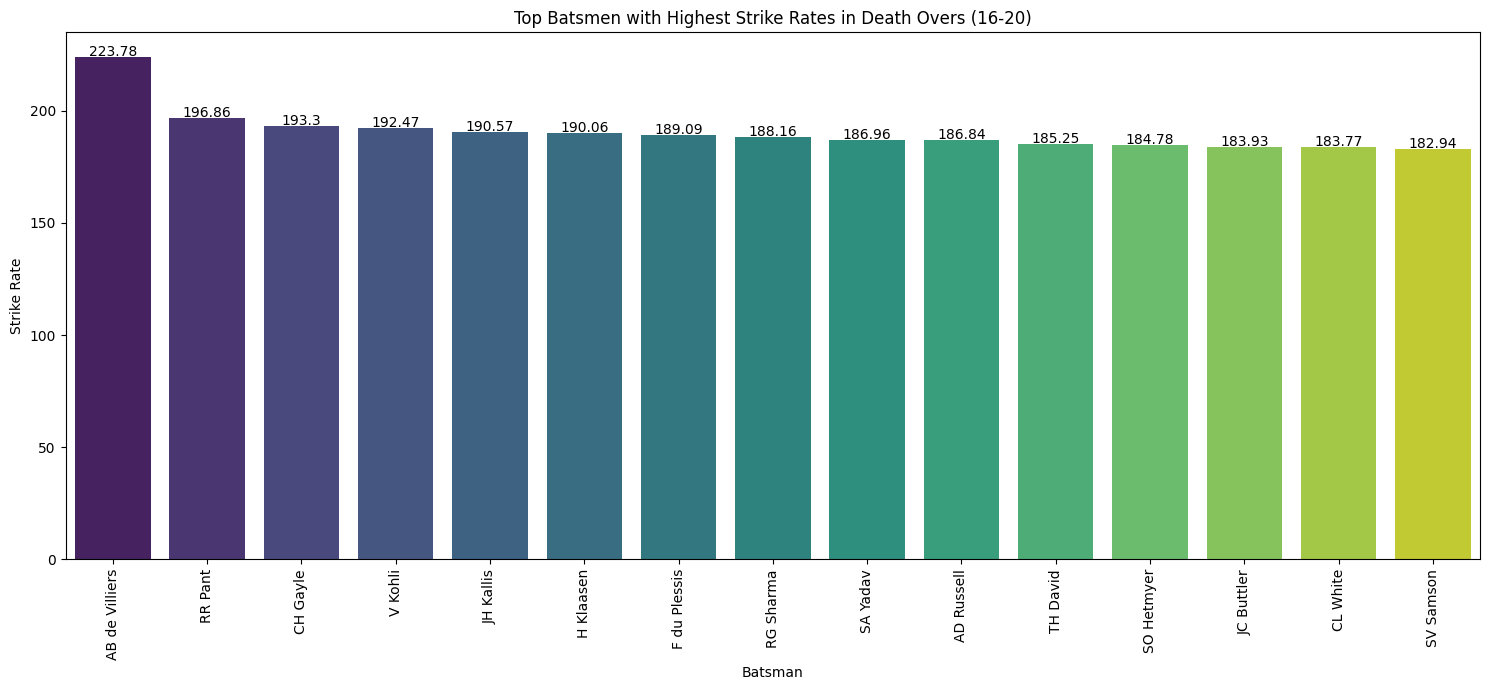

In [71]:
final_overs_data = deliveries_df[(deliveries_df['over'] >= 16) & (deliveries_df['over'] < 20)]
batsman_stats = final_overs_data.groupby('batter').agg(
    runs_scored=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count')
).reset_index()
batsman_stats = batsman_stats[batsman_stats['balls_faced'] >= 150]
batsman_stats['strike_rate'] = (batsman_stats['runs_scored'] / batsman_stats['balls_faced']) * 100
top_strike_rates = batsman_stats.sort_values(by='strike_rate', ascending=False).reset_index(drop=True)
top_15_strike_rates = top_strike_rates.head(15)
plt.figure(figsize=(15, 7))
sns.barplot(data=top_15_strike_rates, x='batter', y='strike_rate', hue='batter', palette='viridis', legend=False)
plt.title('Top Batsmen with Highest Strike Rates in Death Overs (16-20)')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.xticks(rotation=90)
for index, row in top_15_strike_rates.iterrows():
    plt.text(index, row['strike_rate'] + 0.5, round(row['strike_rate'], 2), color='black', ha='center')
plt.tight_layout()
plt.show()

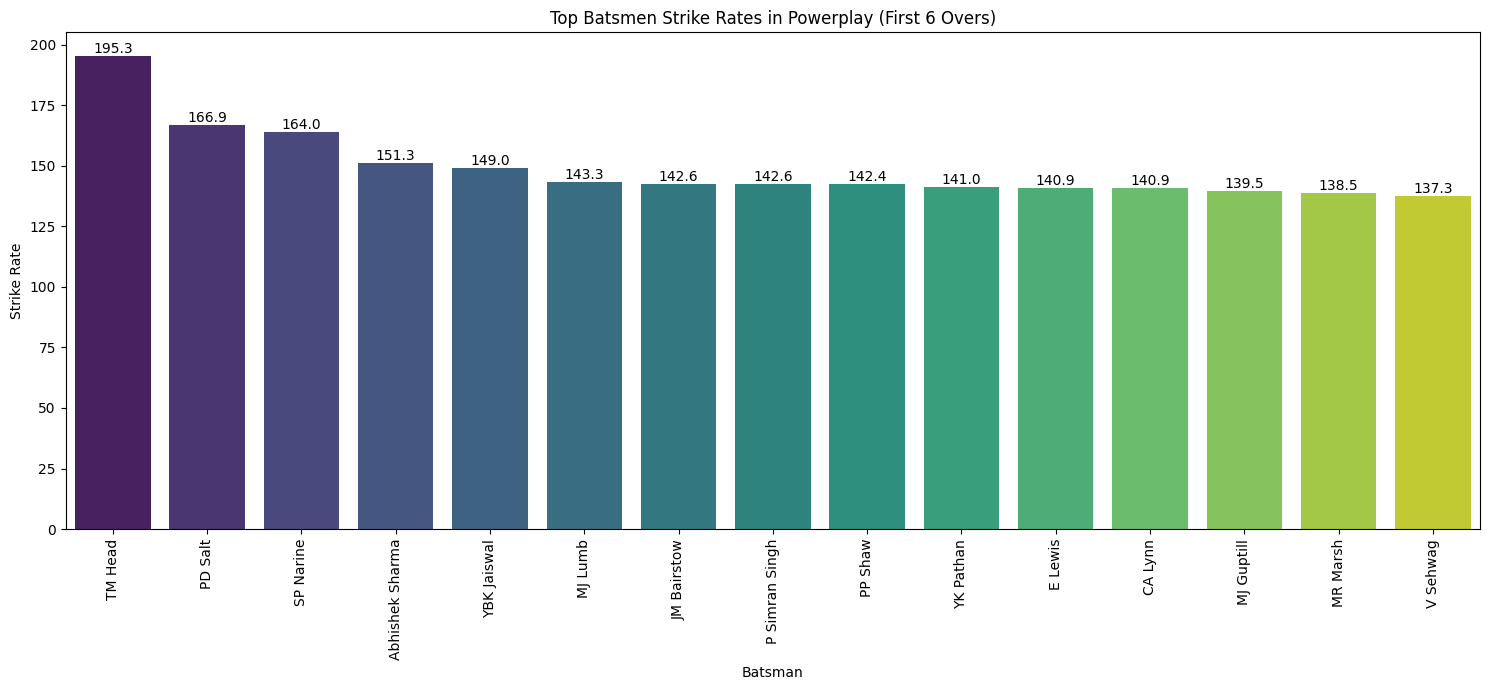

In [72]:
powerplay_data = deliveries_df[deliveries_df['over'] < 6]
batsman_stats = powerplay_data.groupby('batter').agg(
    total_runs=pd.NamedAgg(column='batsman_runs', aggfunc='sum'),
    balls_faced=pd.NamedAgg(column='ball', aggfunc='count')
).reset_index()
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100
batsman_stats = batsman_stats[batsman_stats['balls_faced'] >= 150]
top_strike_rates_powerplay = batsman_stats.sort_values(by='strike_rate', ascending=False).reset_index(drop=True)
top_strike_rates_powerplay=top_strike_rates_powerplay.head(15)
plt.figure(figsize=(15, 7))
sns.barplot(data=top_strike_rates_powerplay, x='batter', y='strike_rate', hue='batter', palette='viridis', legend=False)
plt.title('Top Batsmen Strike Rates in Powerplay (First 6 Overs)')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.xticks(rotation=90)
for index, value in enumerate(top_strike_rates_powerplay['strike_rate']):
    plt.text(index, value, f'{value:.1f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [73]:
def compare_batsmen_strike_rate(batsman1, batsman2):
    df = deliveries_df[deliveries_df['batter'].isin([batsman1, batsman2])]
    def strike_rate(over_start, over_end):
        data = df[(df['over'] >= over_start) & (df['over'] < over_end)]
        stats = data.groupby('batter').agg(runs=('batsman_runs', 'sum'), balls=('ball', 'count'))
        stats['strike_rate'] = (stats['runs'] / stats['balls']) * 100
        return stats['strike_rate']
    sr_powerplay = strike_rate(0, 6)
    sr_death = strike_rate(16, 20)
    comparison = pd.DataFrame({
        'batter': [batsman1, batsman2],
        'Powerplay SR': [sr_powerplay.get(batsman1, 0), sr_powerplay.get(batsman2, 0)],
        'Death SR': [sr_death.get(batsman1, 0), sr_death.get(batsman2, 0)]
    })
    x = range(len(comparison))
    bar_width = 0.35
    plt.figure(figsize=(12, 6))
    plt.bar(x, comparison['Powerplay SR'], width=bar_width, label='Powerplay SR', alpha=0.7)
    plt.bar([p + bar_width for p in x], comparison['Death SR'], width=bar_width, label='Death SR', alpha=0.7)
    for i, row in comparison.iterrows():
        plt.text(i, row['Powerplay SR'], f"{row['Powerplay SR']:.1f}", ha='center', va='bottom')
        plt.text(i + bar_width, row['Death SR'], f"{row['Death SR']:.1f}", ha='center', va='bottom')
    plt.title(f'Strike Rate Comparison: {batsman1} vs {batsman2}')
    plt.xlabel('Batter')
    plt.ylabel('Strike Rate')
    plt.xticks([p + bar_width / 2 for p in x], comparison['batter'])
    plt.legend()
    plt.tight_layout()
    plt.show()

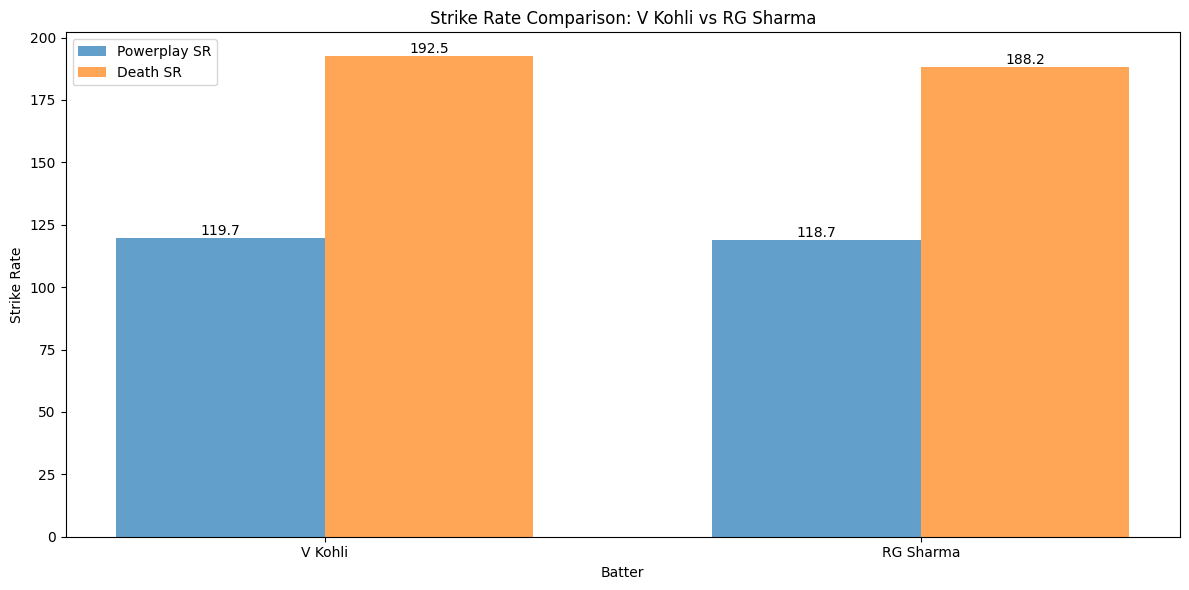

In [74]:
compare_batsmen_strike_rate('V Kohli', 'RG Sharma')

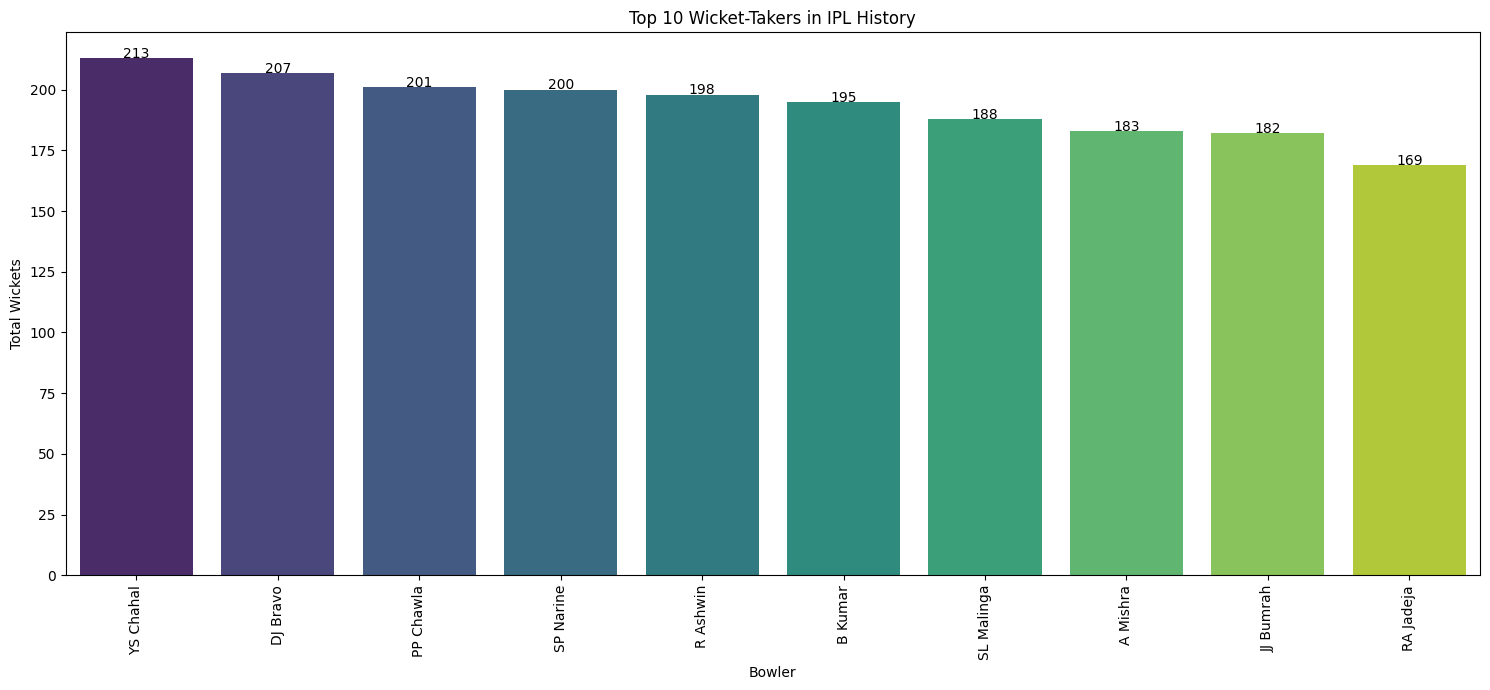

In [75]:
most_wicket_taker = deliveries_df[['bowler', 'is_wicket']]
most_wicket_taker = most_wicket_taker.groupby('bowler')['is_wicket'].sum().reset_index(name='total_wicket')
most_wicket_taker = most_wicket_taker.sort_values(by='total_wicket', ascending=False).reset_index(drop=True)
top_wicket_takers = most_wicket_taker.head(10)
plt.figure(figsize=(15, 7))
bar_plot = sns.barplot(data=top_wicket_takers, x='bowler', y='total_wicket', hue='bowler', palette='viridis', legend=False)
for index, row in top_wicket_takers.iterrows():
    bar_plot.text(index, row.total_wicket + 0.1, row.total_wicket, color='black', ha="center")
plt.title('Top 10 Wicket-Takers in IPL History')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

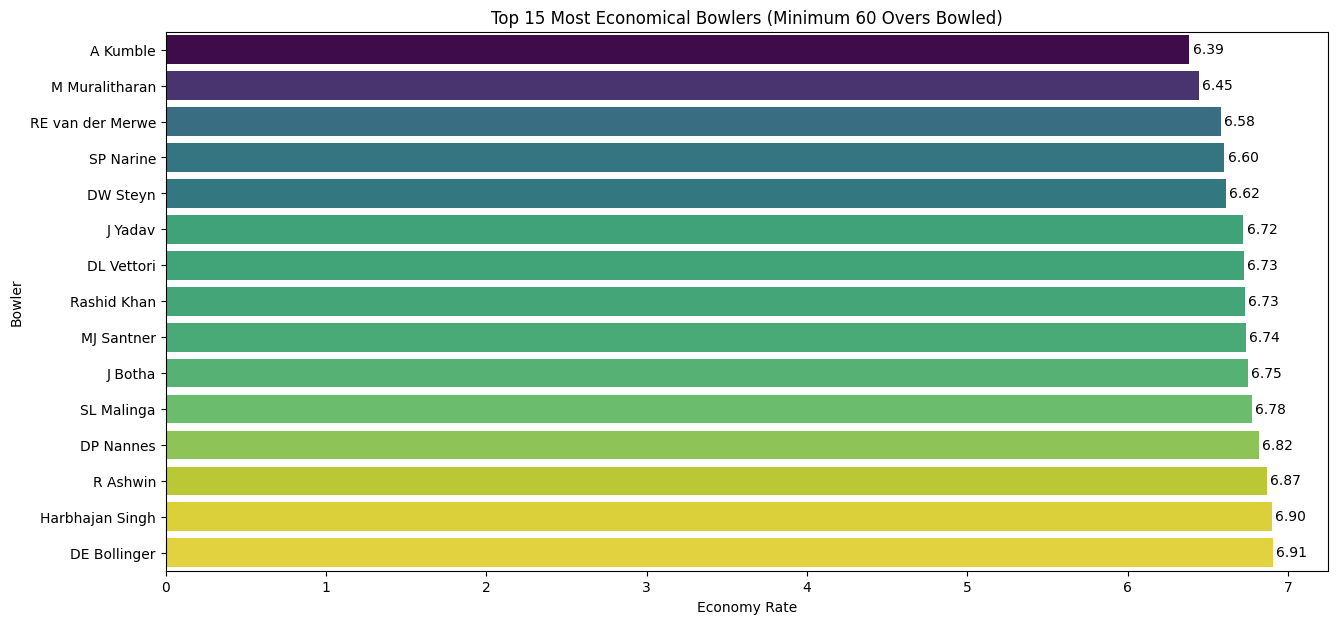

In [76]:
runs_conceded = deliveries_df.groupby('bowler')['batsman_runs'].sum().reset_index(name='runs_conceded')
valid_deliveries = deliveries_df[~deliveries_df['extras_type'].isin(['wides', 'noballs'])]
balls_bowled = valid_deliveries.groupby('bowler')['ball'].count().reset_index(name='balls_bowled')
balls_bowled['overs_bowled'] = balls_bowled['balls_bowled'] / 6
bowler_stats = pd.merge(runs_conceded, balls_bowled[['bowler', 'overs_bowled']], on='bowler', how='left')
bowler_stats['economy_rate'] = bowler_stats['runs_conceded'] / bowler_stats['overs_bowled']
bowler_stats = bowler_stats[bowler_stats['overs_bowled']>=60]
most_economical_bowlers = bowler_stats.sort_values(by='economy_rate').reset_index(drop=True)
top_15_most_economical_bowlers = most_economical_bowlers.head(15)
plt.figure(figsize=(15, 7))
bar_plot = sns.barplot(data=top_15_most_economical_bowlers, x='economy_rate', y='bowler', hue='economy_rate', palette='viridis', legend=False)
plt.title('Top 15 Most Economical Bowlers (Minimum 60 Overs Bowled)')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
for index, row in top_15_most_economical_bowlers.iterrows():
    bar_plot.text(row['economy_rate'] + 0.02, index, f"{row['economy_rate']:.2f}", color='black', ha="left", va="center")
plt.show()

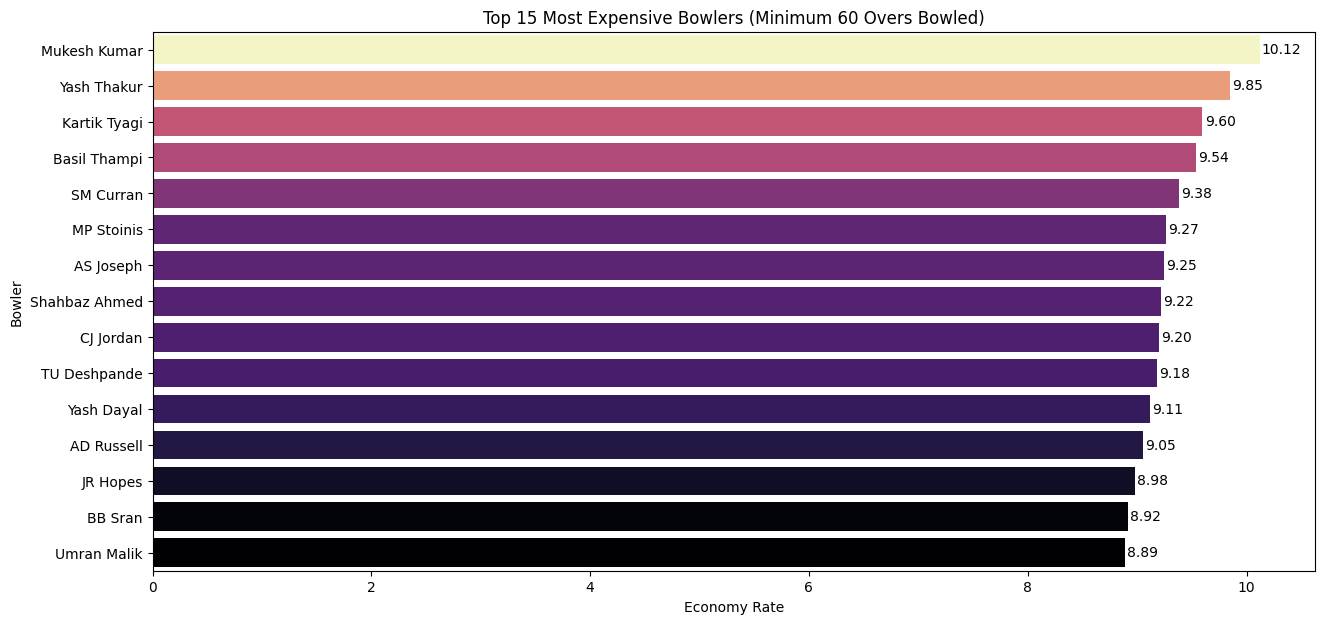

In [77]:
most_expensive_bowlers= bowler_stats.sort_values(by='economy_rate', ascending=False).head(15).reset_index(drop=True)
plt.figure(figsize=(15, 7))
bar_plot = sns.barplot(data=most_expensive_bowlers, x='economy_rate', y='bowler', hue='economy_rate', palette='magma', legend=False)
plt.title('Top 15 Most Expensive Bowlers (Minimum 60 Overs Bowled)')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
for index, row in most_expensive_bowlers.iterrows():
    bar_plot.text(row['economy_rate'] + 0.02, index, f"{row['economy_rate']:.2f}", color='black', ha="left", va="center")
plt.show()

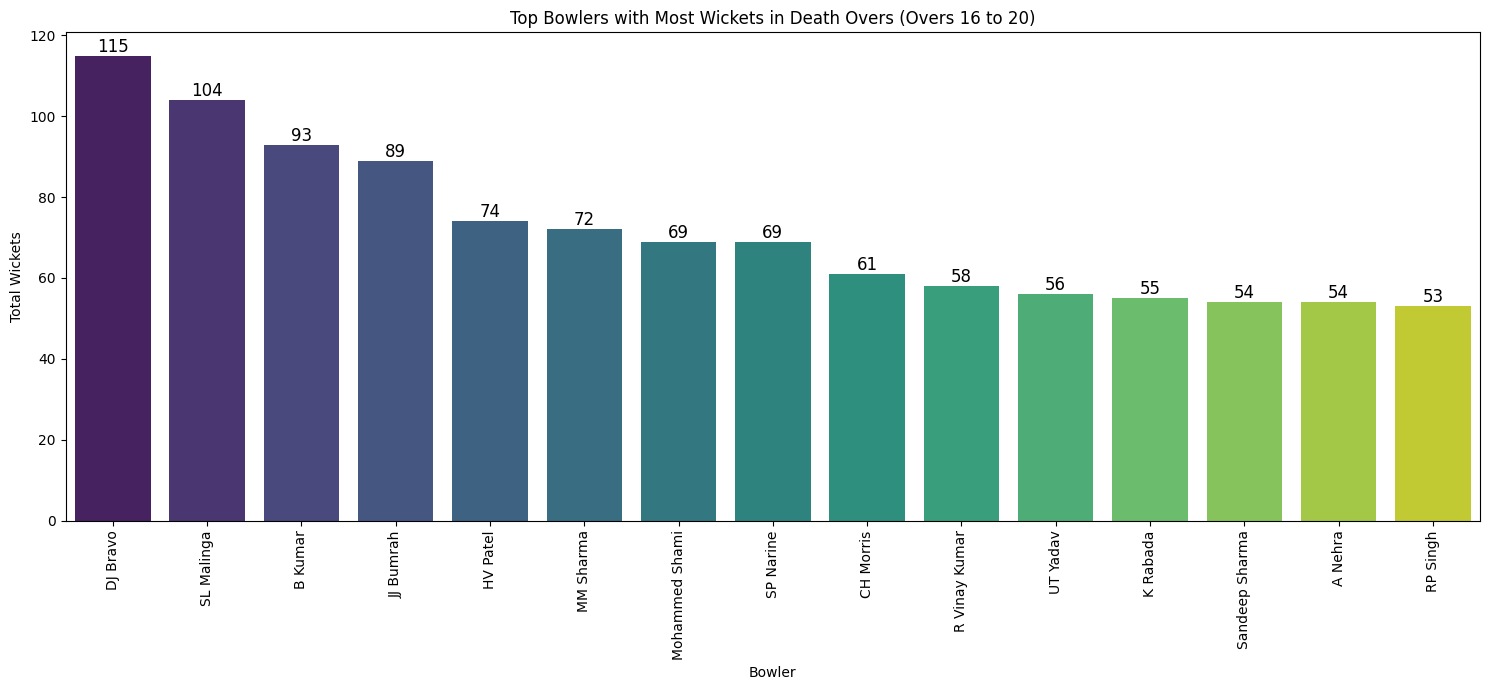

In [78]:
death_overs = deliveries_df[(deliveries_df['over'] >= 16) & (deliveries_df['over'] <= 20)]
wickets_in_death_overs = death_overs.groupby('bowler')['is_wicket'].sum().reset_index(name='total_wickets')
most_wickets_death_overs = wickets_in_death_overs.sort_values(by='total_wickets', ascending=False)
top_bowlers_death_overs = most_wickets_death_overs.head(15).reset_index(drop=True)
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=top_bowlers_death_overs, x='bowler', y='total_wickets', hue='bowler', palette='viridis', legend=False)
plt.title('Top Bowlers with Most Wickets in Death Overs (Overs 16 to 20)')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12)
plt.tight_layout()
plt.show()

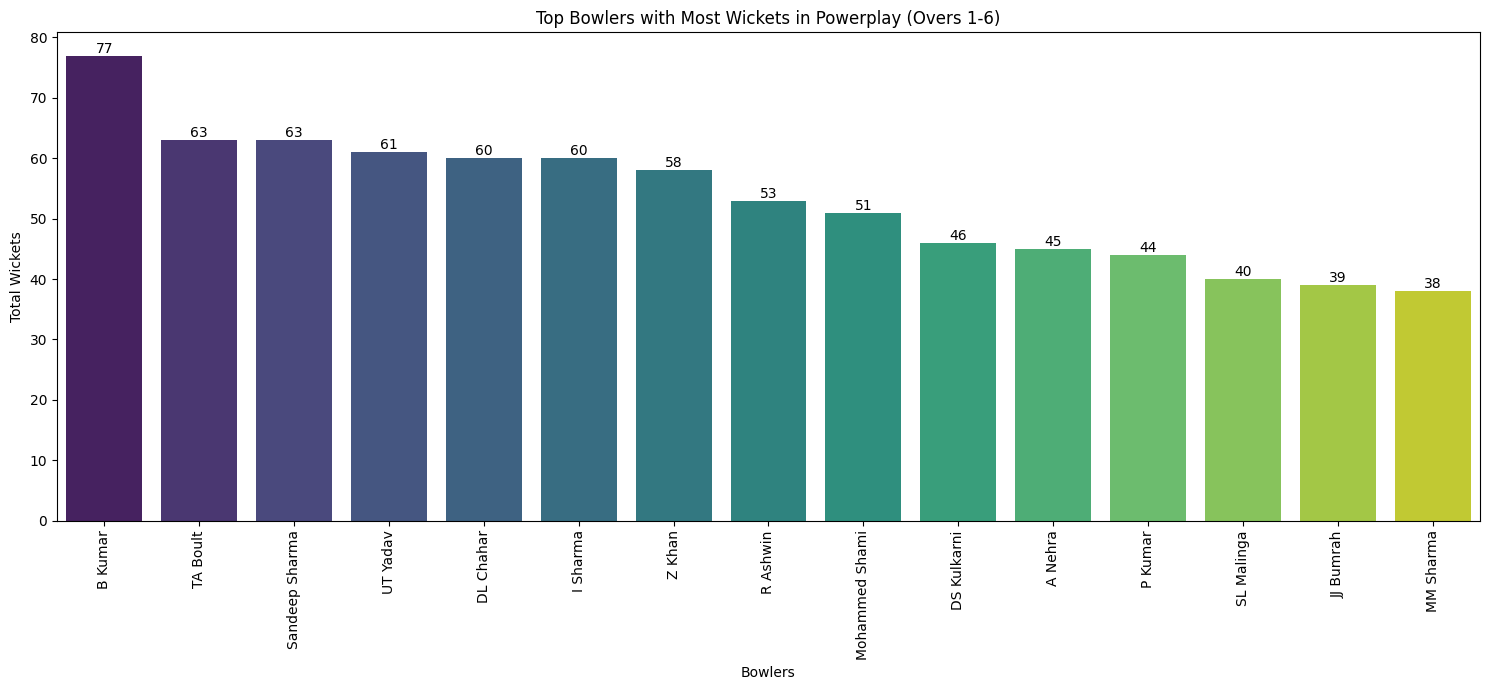

In [79]:
powerplay_data = deliveries_df[(deliveries_df['over'] >= 0) & (deliveries_df['over'] < 6)]
wickets_powerplay = powerplay_data[powerplay_data['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().reset_index(name='total_wickets')
top_bowlers_powerplay = wickets_powerplay.sort_values(by='total_wickets', ascending=False).reset_index(drop=True)
top_bowlers_powerplay = top_bowlers_powerplay.head(15)
plt.figure(figsize=(15, 7))
sns.barplot(x='bowler', y='total_wickets', data=top_bowlers_powerplay, hue='bowler', palette='viridis', legend=False)
plt.title('Top Bowlers with Most Wickets in Powerplay (Overs 1-6)')
plt.xlabel('Bowlers')
plt.ylabel('Total Wickets')
plt.xticks(rotation=90)
for index, value in enumerate(top_bowlers_powerplay['total_wickets']):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [80]:
def plot_bowler_comparison(bowler1, bowler2):
    df = deliveries_df.copy()
    pp_wkts = df[(df['over'] < 6) & (df['is_wicket'] == 1)].groupby('bowler').size()
    death_wkts = df[(df['over'] >= 16) & (df['over'] < 20) & (df['is_wicket'] == 1)].groupby('bowler').size()
    data = pd.DataFrame({
        'bowler': [bowler1, bowler2],
        'Powerplay': [pp_wkts.get(bowler1, 0), pp_wkts.get(bowler2, 0)],
        'Death Overs': [death_wkts.get(bowler1, 0), death_wkts.get(bowler2, 0)]
    })
    x = range(len(data))
    bw = 0.35
    plt.figure(figsize=(10, 6))
    plt.bar(x, data['Powerplay'], width=bw, label='Powerplay', color='blue')
    plt.bar([i + bw for i in x], data['Death Overs'], width=bw, label='Death Overs', color='red')
    for i, (pp, do) in enumerate(zip(data['Powerplay'], data['Death Overs'])):
        plt.text(i, pp, pp, ha='center', va='bottom')
        plt.text(i + bw, do, do, ha='center', va='bottom')
    plt.xticks([i + bw/2 for i in x], data['bowler'])
    plt.xlabel('Bowler')
    plt.ylabel('Wickets')
    plt.title(f'{bowler1} vs {bowler2} - Wicket Comparison')
    plt.legend()
    plt.tight_layout()
    plt.show()

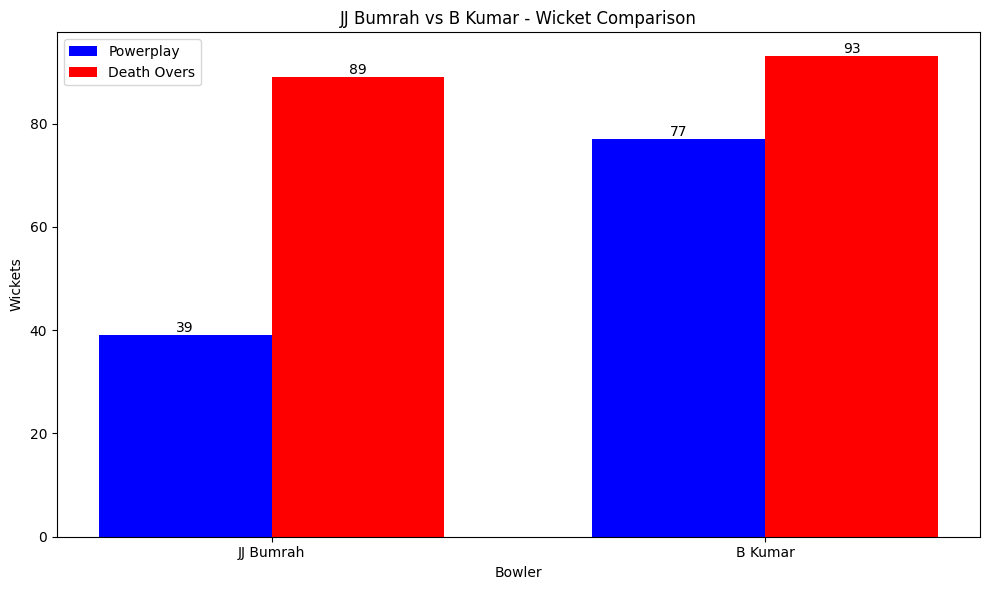

In [81]:
plot_bowler_comparison('JJ Bumrah', 'B Kumar')

In [82]:
def top_bowlers_dismissing_batsman(batsman_name):
    dismissals = deliveries_df[deliveries_df['player_dismissed'] == batsman_name]
    bowler_dismissals = dismissals.groupby('bowler').size().reset_index(name='dismissals')
    top_5_bowlers = bowler_dismissals.sort_values(by='dismissals', ascending=False).head(10)
    plt.figure(figsize=(15, 7))
    ax = sns.barplot(x='bowler', y='dismissals', hue='bowler', data=top_5_bowlers, palette='Blues_d', legend=False)
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', size=12, xytext=(0, 8),
                    textcoords='offset points')
    plt.title(f'Top 5 Bowlers Who Dismissed {batsman_name} the Most')
    plt.xlabel('Bowler')
    plt.ylabel('Number of Dismissals')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

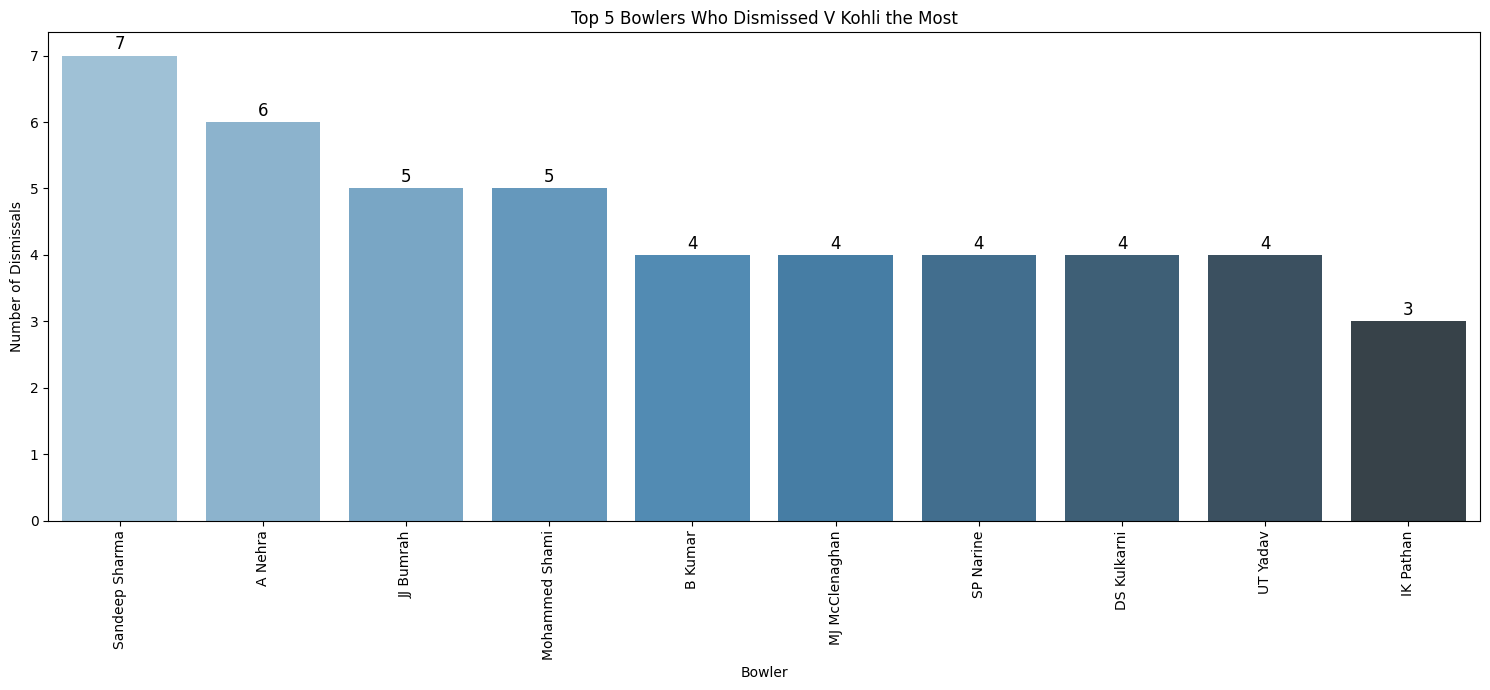

In [83]:
top_bowlers_dismissing_batsman('V Kohli')

In [85]:
def top_batsmen_against_bowler(bowler_name):
    deliveries_by_bowler = deliveries_df[deliveries_df['bowler'] == bowler_name]
    batsman_runs = deliveries_by_bowler.groupby('batter')['batsman_runs'].sum().reset_index(name='runs_scored')
    top_10_batsmen = batsman_runs.sort_values(by='runs_scored', ascending=False).head(10)
    plt.figure(figsize=(15, 7))
    ax = sns.barplot(x='batter', y='runs_scored', hue='batter', data=top_10_batsmen, palette='Blues_d', legend=False)
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', size=12, xytext=(0, 8),
                    textcoords='offset points')
    plt.title(f'Top 10 Batsmen Scoring Most Runs Against {bowler_name}')
    plt.xlabel('Batsman')
    plt.ylabel('Runs Scored')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

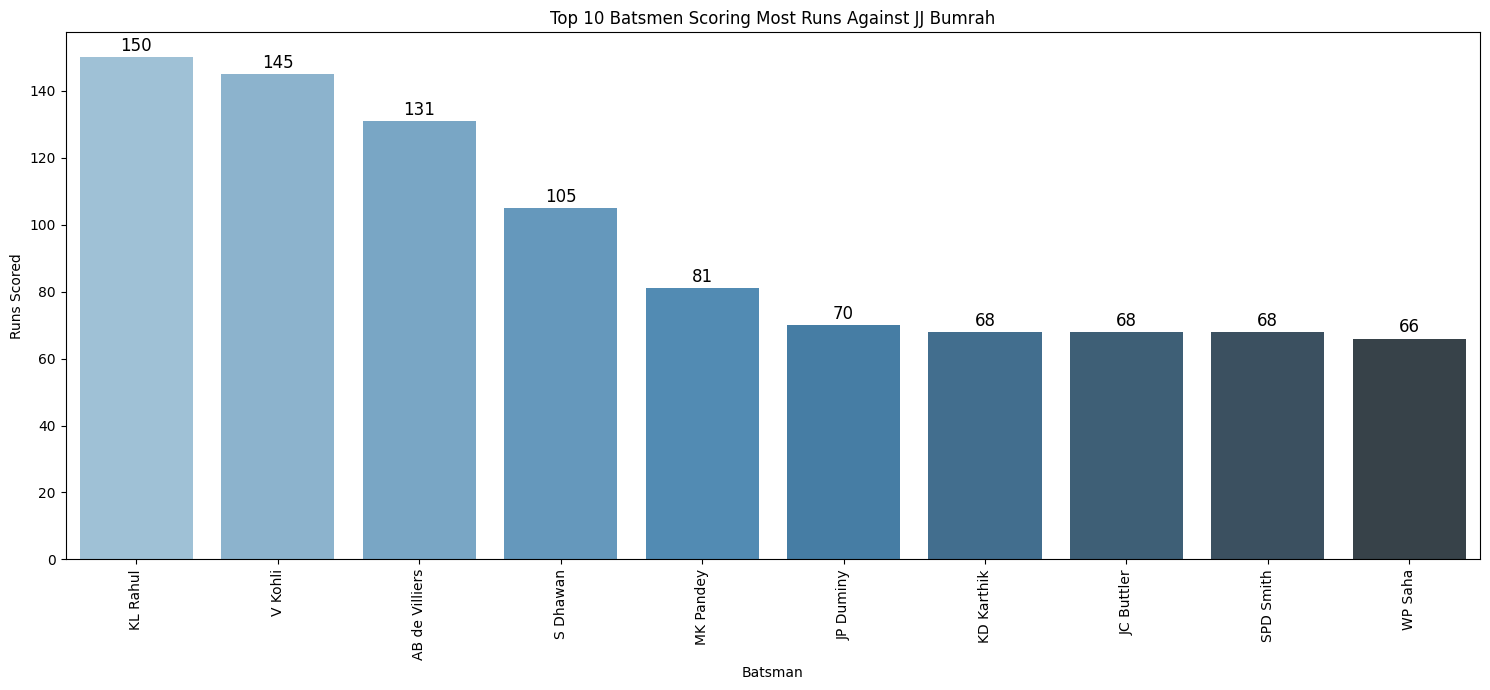

In [87]:
top_batsmen_against_bowler('JJ Bumrah')

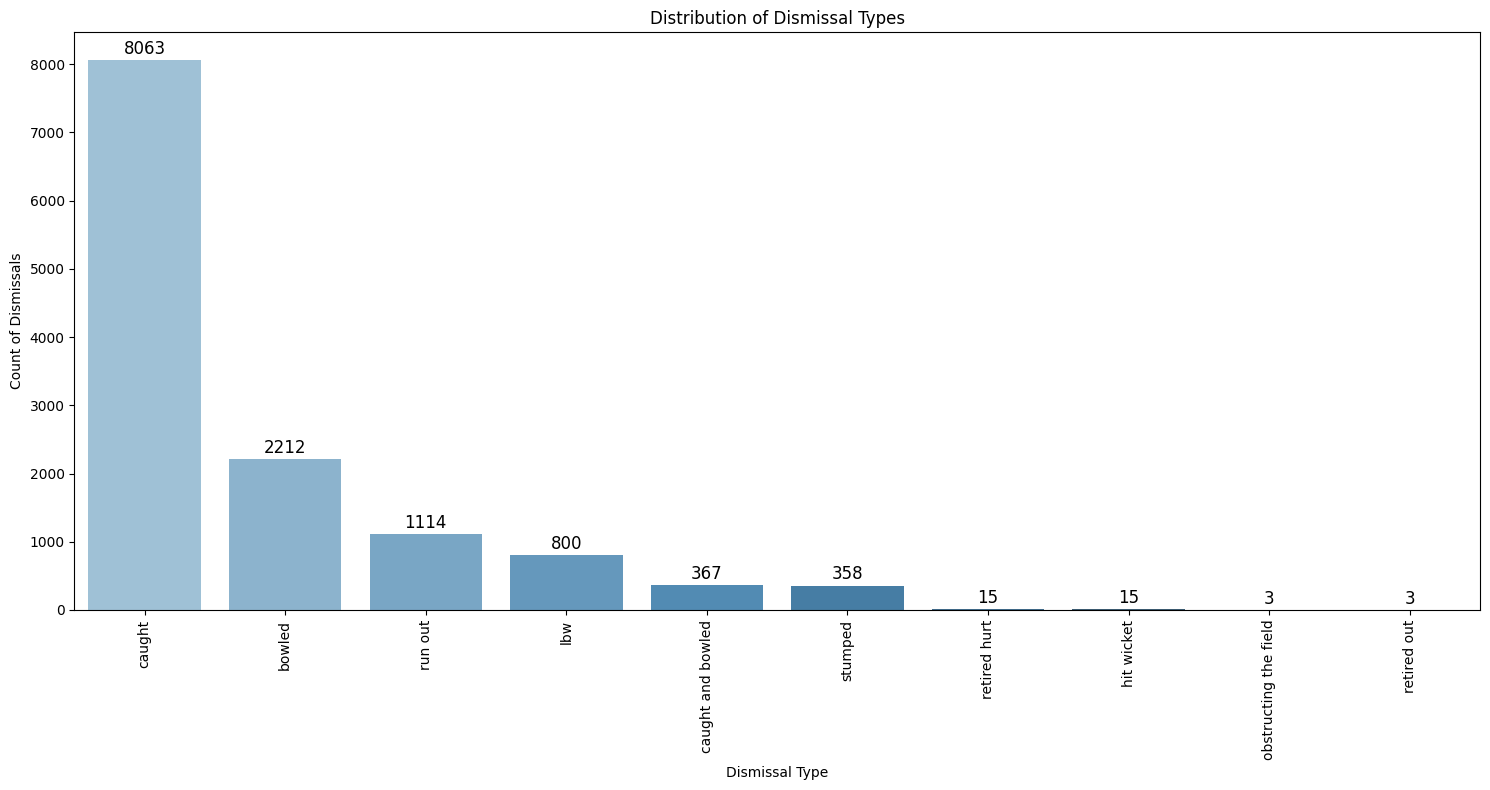

In [89]:
dismissals = deliveries_df[deliveries_df['is_wicket'] == 1]
dismissal_counts = dismissals.groupby('dismissal_kind')['is_wicket'].count().reset_index(name='count')
dismissal_counts = dismissal_counts.sort_values(by='count', ascending=False)
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='dismissal_kind', y='count', hue='dismissal_kind', data=dismissal_counts, palette='Blues_d', legend=False)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8),
                textcoords='offset points')
plt.title('Distribution of Dismissal Types')
plt.xlabel('Dismissal Type')
plt.ylabel('Count of Dismissals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()